#PREPARE

##INSTALL 

In [1]:
!pip install lazypredict
#!pip instlal pyforest

##IMPORT

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
#from lazypredict.Supervised import LazyClassifier
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

#import warnings
#warnings.filterwarnings("ignore")

## IMPORT DATASET VIA GOOGLE DRIVE 
https://drive.google.com/drive/folders/11tIdB2NihEZlyaCjP3foDQUZEsg0h5f5?usp=share_link

In [ ]:
                                                                              ###### ACCESS VIA GOOGLE DRIVE https://drive.google.com/drive/folders/11tIdB2NihEZlyaCjP3foDQUZEsg0h5f5?usp=share_link ######
from google.colab import drive
drive.mount('/content/drive')

#KDD99 dataset
KDD99_df_path="/content/drive/MyDrive/dataset/kddcup1999/kddcup.data/kddcup.data"
#---------------------------------------------------------------------#
#NSL-KDD dataset
NSL_KDD_train_path="https://raw.githubusercontent.com/twelfthywn/research/main/data/KDDTrain%2B.txt"
NSL_KDD_test_path="https://raw.githubusercontent.com/twelfthywn/research/main/data/KDDTest%2B.txt"
#---------------------------------------------------------------------#
#CICIDS2017 datasset
CICIDS_df1_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
CICIDS_df2_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
CICIDS_df3_path="/content/drive/MyDrive/dataset/cicisd2017/Friday-WorkingHours-Morning.pcap_ISCX.csv"
CICIDS_df4_path="/content/drive/MyDrive/dataset/cicisd2017/Monday-WorkingHours.pcap_ISCX.csv"
CICIDS_df5_path="/content/drive/MyDrive/dataset/cicisd2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
CICIDS_df6_path="/content/drive/MyDrive/dataset/cicisd2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
CICIDS_df7_path="/content/drive/MyDrive/dataset/cicisd2017/Tuesday-WorkingHours.pcap_ISCX.csv"
CICIDS_df8_path="/content/drive/MyDrive/dataset/cicisd2017/Wednesday-workingHours.pcap_ISCX.csv"
#---------------------------------------------------------------------#
#UNSW-NB15 dataset
UNSW_NB15_train_path="/content/drive/MyDrive/dataset/UNSW-NB15/UNSW_NB15_training-set.csv"
UNSW_NB15_test_path="/content/drive/MyDrive/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv"
#---------------------------------------------------------------------#

##IMPORT DATASET VIA KAGGLE

In [2]:
                                                                                                                                ###### ACCESS VIA KAGLE ######

#KDD99 dataset                              https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data
KDD99_df_path="/kaggle/input/kdd-cup-1999-data/kddcup.data.gz"
#---------------------------------------------------------------------#
#NSL-KDD dataset                            https://www.kaggle.com/datasets/hassan06/nslkdd
NSL_KDD_train_path="/kaggle/input/nslkdd/KDDTrain+.txt"
NSL_KDD_test_path="/kaggle/input/nslkdd/KDDTest+.txt"
#---------------------------------------------------------------------#
#CICIDS2017 datasset                        https://www.kaggle.com/datasets/cicdataset/cicids2017
CICIDS_df1_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
CICIDS_df2_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
CICIDS_df3_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv"
CICIDS_df4_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv"
CICIDS_df5_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
CICIDS_df6_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
CICIDS_df7_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv"
CICIDS_df8_path="/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"
#---------------------------------------------------------------------#
#UNSW-NB15 dataset                          https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
UNSW_NB15_train_path="/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv"
UNSW_NB15_test_path="/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv"
#---------------------------------------------------------------------#

# KDD99

In [57]:
datacols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins", 
"logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]
  
df=pd.read_csv(KDD99_df_path, sep=",", names=datacols)

In [58]:
print(df.info())
print("-------------------------------------------")
print(df.head(5))
print("-------------------------------------------")
print(df.dtypes[df.dtypes == object])
print("-------------------------------------------")
print(df['attack'].value_counts())
print("-------------------------------------------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

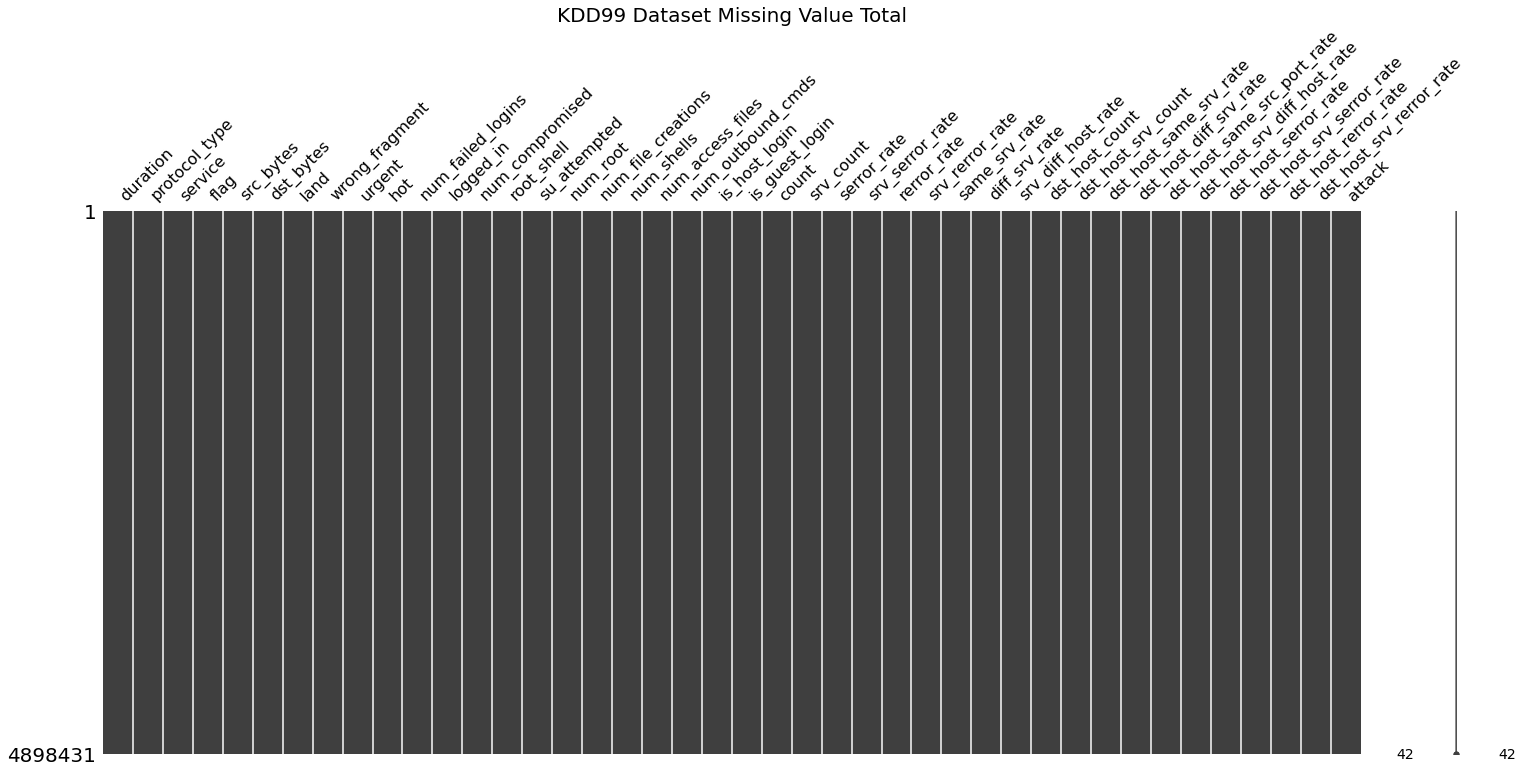

In [59]:
#missing value
msno.matrix(df)
plt.title("KDD99 Dataset Missing Value Total", fontsize = 20)
plt.show()

                             duration  src_bytes  dst_bytes  land  wrong_fragment  urgent   hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate
duration                         1.00       0.04       0.02 -0.00           -0.00    0.00  0.00               0.01      -0.02             0.03        0.03          0.05      0.03                0.10       -0.00              0.02                NaN          -0.00            0.00  -0.11      -0.08        -0.03            -0.03         0.02             0.0

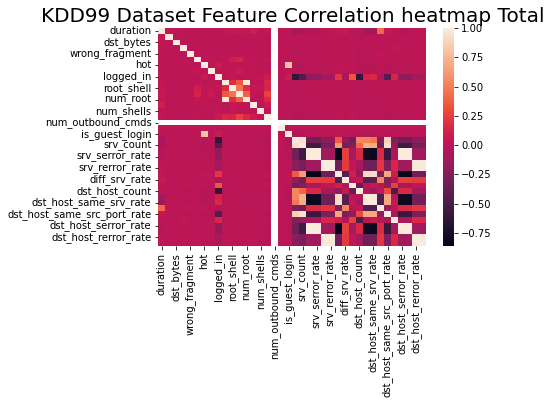

In [60]:
print(df.corr())
  
# plotting correlation heatmap
plt.title("KDD99 Dataset Feature Correlation heatmap Total", fontsize = 20)
ax = sns.heatmap(df.corr())
plt.show()

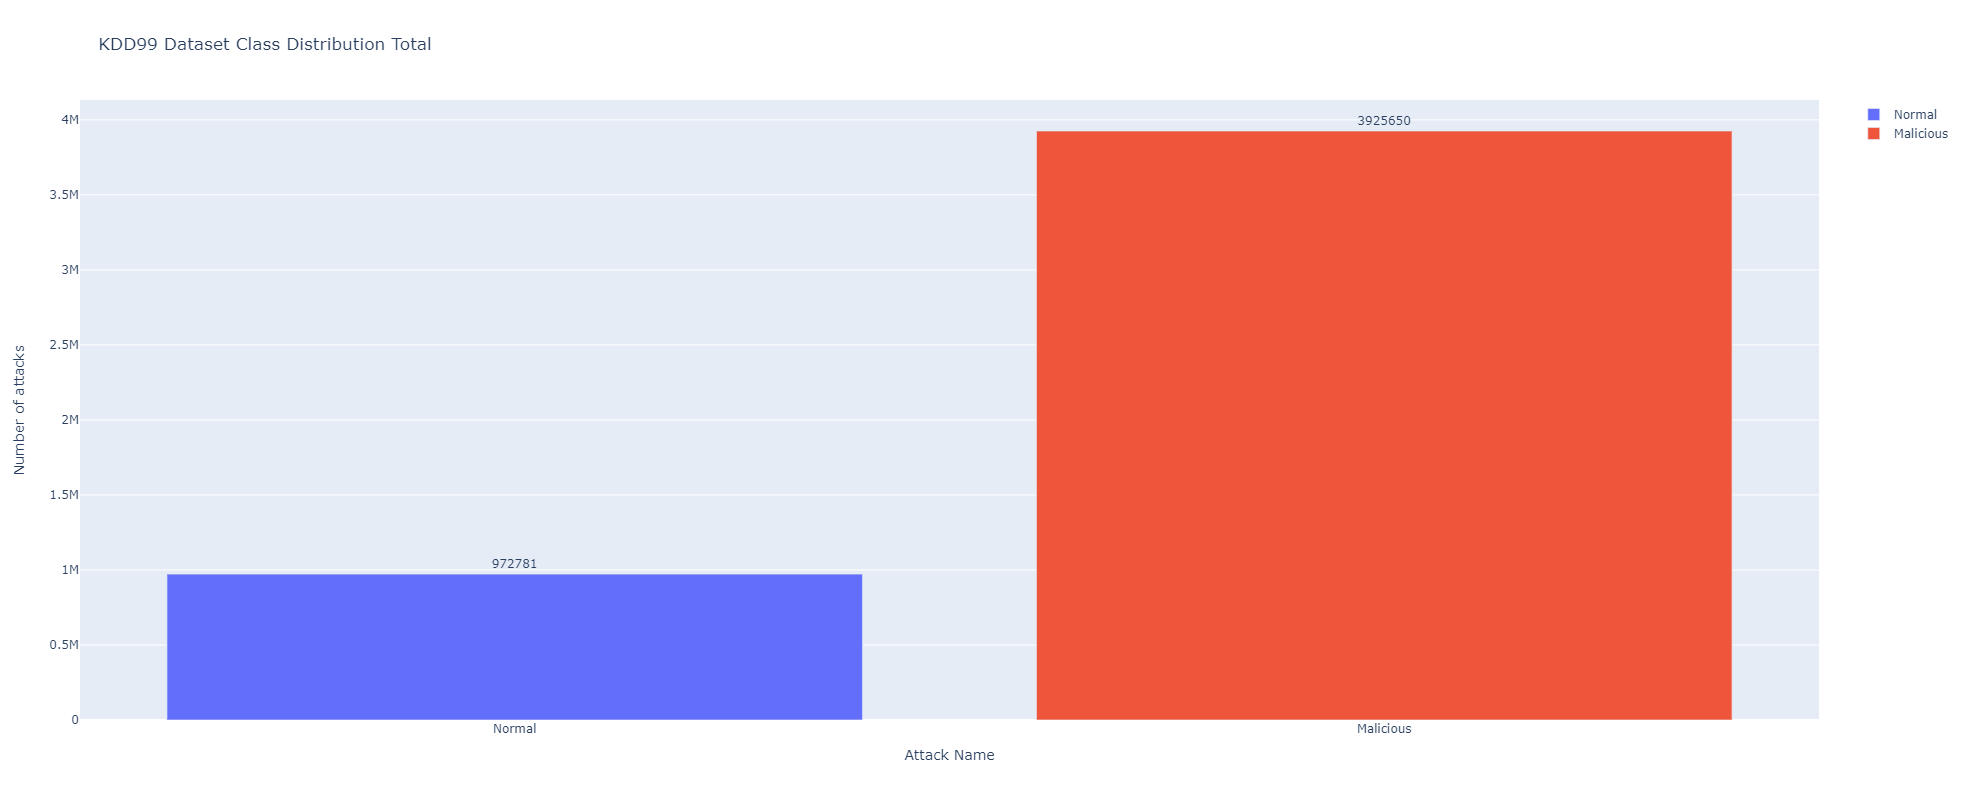

In [61]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=df.iloc[:,-1].value_counts().sum()- df.iloc[:,-1].value_counts().values[2:3],
           x=['Malicious'],
           text = df.iloc[:,-1].value_counts().sum() - df.iloc[:,-1].value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

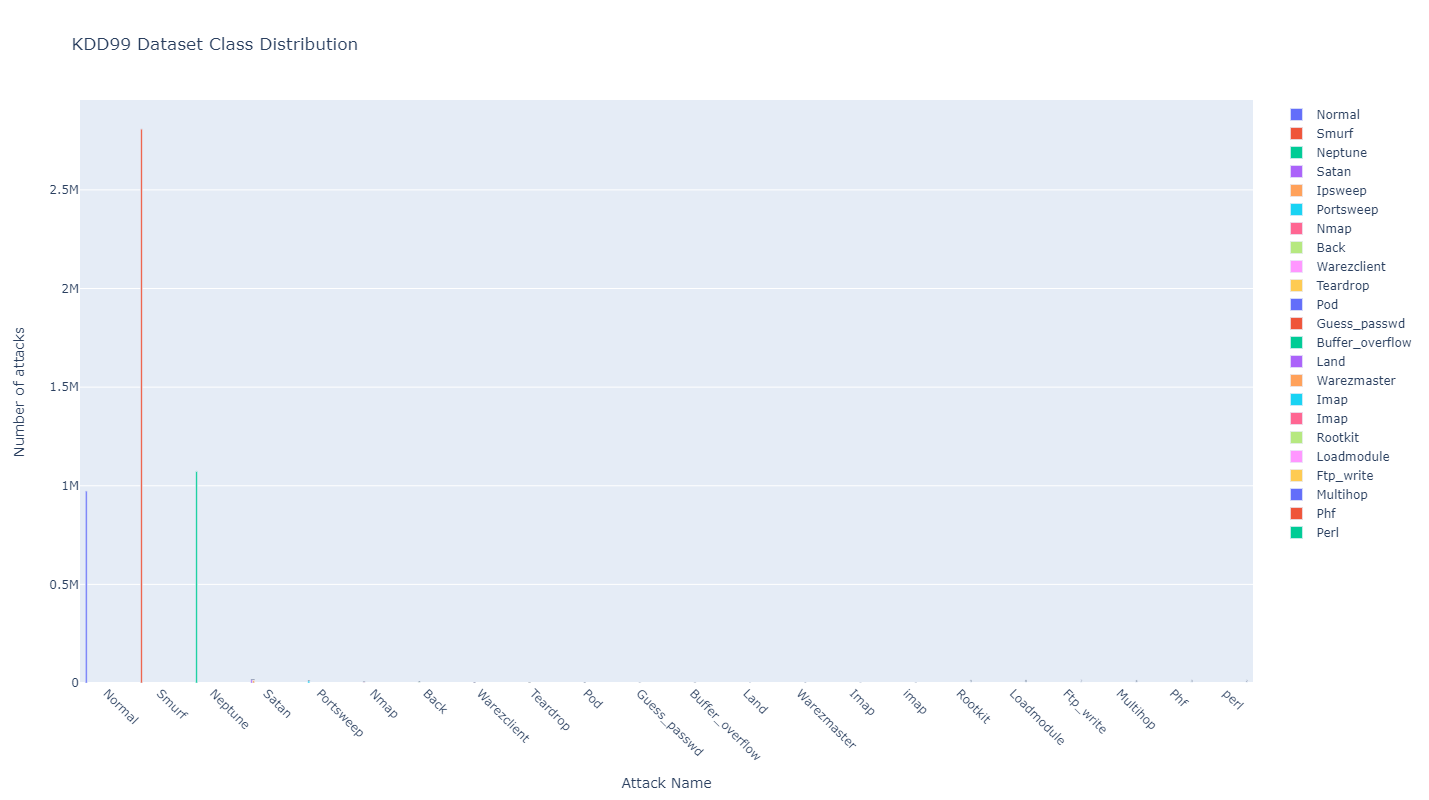

In [62]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Smurf'],
           text = df.iloc[:,-1].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=df.iloc[:,-1].value_counts().values[1:2],
           x=['Neptune'],
           text = df.iloc[:,-1].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=df.iloc[:,-1].value_counts().values[3:4],
           x=['Satan'],
           text = df.iloc[:,-1].value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=df.iloc[:,-1].value_counts().values[4:5],
           x=['Satan'],
           text = df.iloc[:,-1].value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=df.iloc[:,-1].value_counts().values[5:6],
           x=['Portsweep'],
           text = df.iloc[:,-1].value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=df.iloc[:,-1].value_counts().values[6:7],
           x=['Nmap'],
           text = df.iloc[:,-1].value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=df.iloc[:,-1].value_counts().values[7:8],
           x=['Back'],
           text = df.iloc[:,-1].value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=df.iloc[:,-1].value_counts().values[8:9],
           x=['Warezclient'],
           text = df.iloc[:,-1].value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=df.iloc[:,-1].value_counts().values[9:10],
           x=['Teardrop'],
           text = df.iloc[:,-1].value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=df.iloc[:,-1].value_counts().values[10:11],
           x=['Pod'],
           text = df.iloc[:,-1].value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=df.iloc[:,-1].value_counts().values[11:12],
           x=['Guess_passwd'],
           text = df.iloc[:,-1].value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=df.iloc[:,-1].value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = df.iloc[:,-1].value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=df.iloc[:,-1].value_counts().values[13:14],
           x=['Land'],
           text = df.iloc[:,-1].value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=df.iloc[:,-1].value_counts().values[14:15],
           x=['Warezmaster'],
           text = df.iloc[:,-1].value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=df.iloc[:,-1].value_counts().values[15:16],
           x=['Imap'],
           text = df.iloc[:,-1].value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=df.iloc[:,-1].value_counts().values[16:17],
           x=['imap'],
           text = df.iloc[:,-1].value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=df.iloc[:,-1].value_counts().values[17:18],
           x=['Rootkit'],
           text = df.iloc[:,-1].value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=df.iloc[:,-1].value_counts().values[18:19],
           x=['Loadmodule'],
           text = df.iloc[:,-1].value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=df.iloc[:,-1].value_counts().values[19:20],
           x=['Ftp_write'],
           text = df.iloc[:,-1].value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=df.iloc[:,-1].value_counts().values[20:21],
           x=['Multihop'],
           text = df.iloc[:,-1].value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=df.iloc[:,-1].value_counts().values[21:22],
           x=['Phf'],
           text = df.iloc[:,-1].value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=df.iloc[:,-1].value_counts().values[22:23],
           x=['perl'],
           text = df.iloc[:,-1].value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=df.iloc[:,-1].value_counts().values[23:24],
           x=['Spy'],
           text = df.iloc[:,-1].value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [63]:
for i in ['protocol_type',"service","flag"]:
    df[i] = df[i].astype('category').cat.codes   
X=df.iloc[:,:40]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y)

In [64]:

print("-------------------------------------------")

print("-------------------------------------------")
print("-------------------------------------------")
print(y_train.value_counts())
print("-------------------------------------------")
print(y_train.isnull().sum())

print("###########################################") 

print("-------------------------------------------")

print("-------------------------------------------")
print("-------------------------------------------")
print(y_test.value_counts())
print(y_test.isnull().sum())

-------------------------------------------
-------------------------------------------
-------------------------------------------
smurf.              2246308
neptune.             857614
normal.              778225
satan.                12714
ipsweep.               9985
portsweep.             8330
nmap.                  1853
back.                  1762
warezclient.            816
teardrop.               783
pod.                    211
guess_passwd.            42
buffer_overflow.         24
land.                    17
warezmaster.             16
imap.                    10
rootkit.                  8
loadmodule.               7
ftp_write.                6
multihop.                 6
phf.                      3
perl.                     2
spy.                      2
Name: attack, dtype: int64
-------------------------------------------
0
###########################################
-------------------------------------------
-------------------------------------------
-------------------

In [65]:
y_train.value_counts().sum()

3918744

In [66]:
y_train.value_counts()

smurf.              2246308
neptune.             857614
normal.              778225
satan.                12714
ipsweep.               9985
portsweep.             8330
nmap.                  1853
back.                  1762
warezclient.            816
teardrop.               783
pod.                    211
guess_passwd.            42
buffer_overflow.         24
land.                    17
warezmaster.             16
imap.                    10
rootkit.                  8
loadmodule.               7
ftp_write.                6
multihop.                 6
phf.                      3
perl.                     2
spy.                      2
Name: attack, dtype: int64

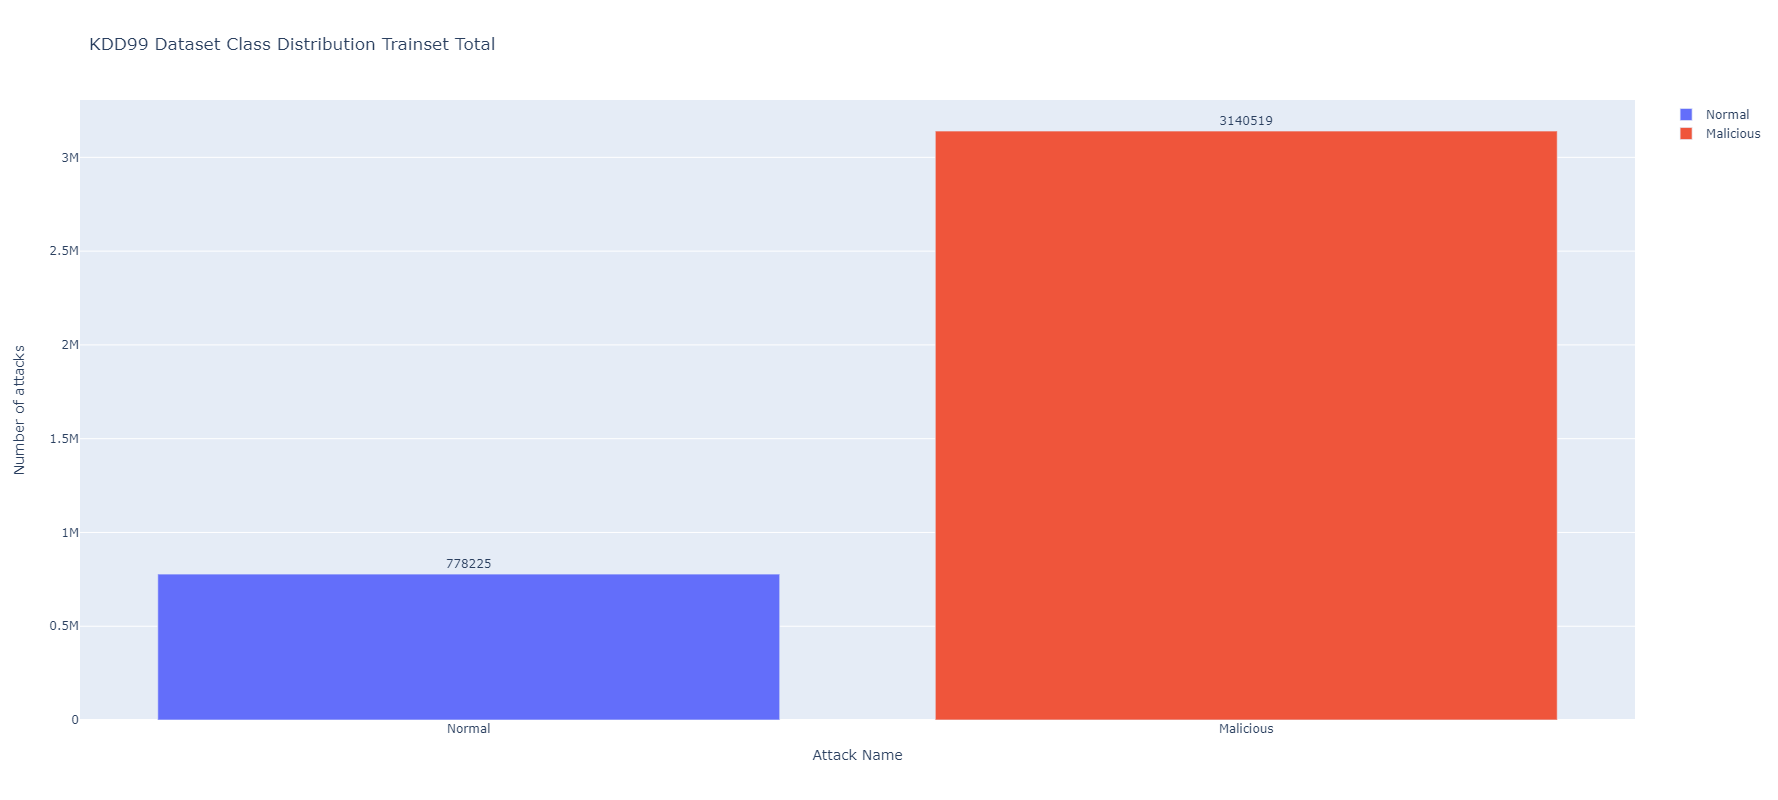

In [67]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[2:3],
           x=['Normal'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_train.value_counts().sum()- y_train.value_counts().values[2:3],
           x=['Malicious'],
           text = y_train.value_counts().sum() - y_train.value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

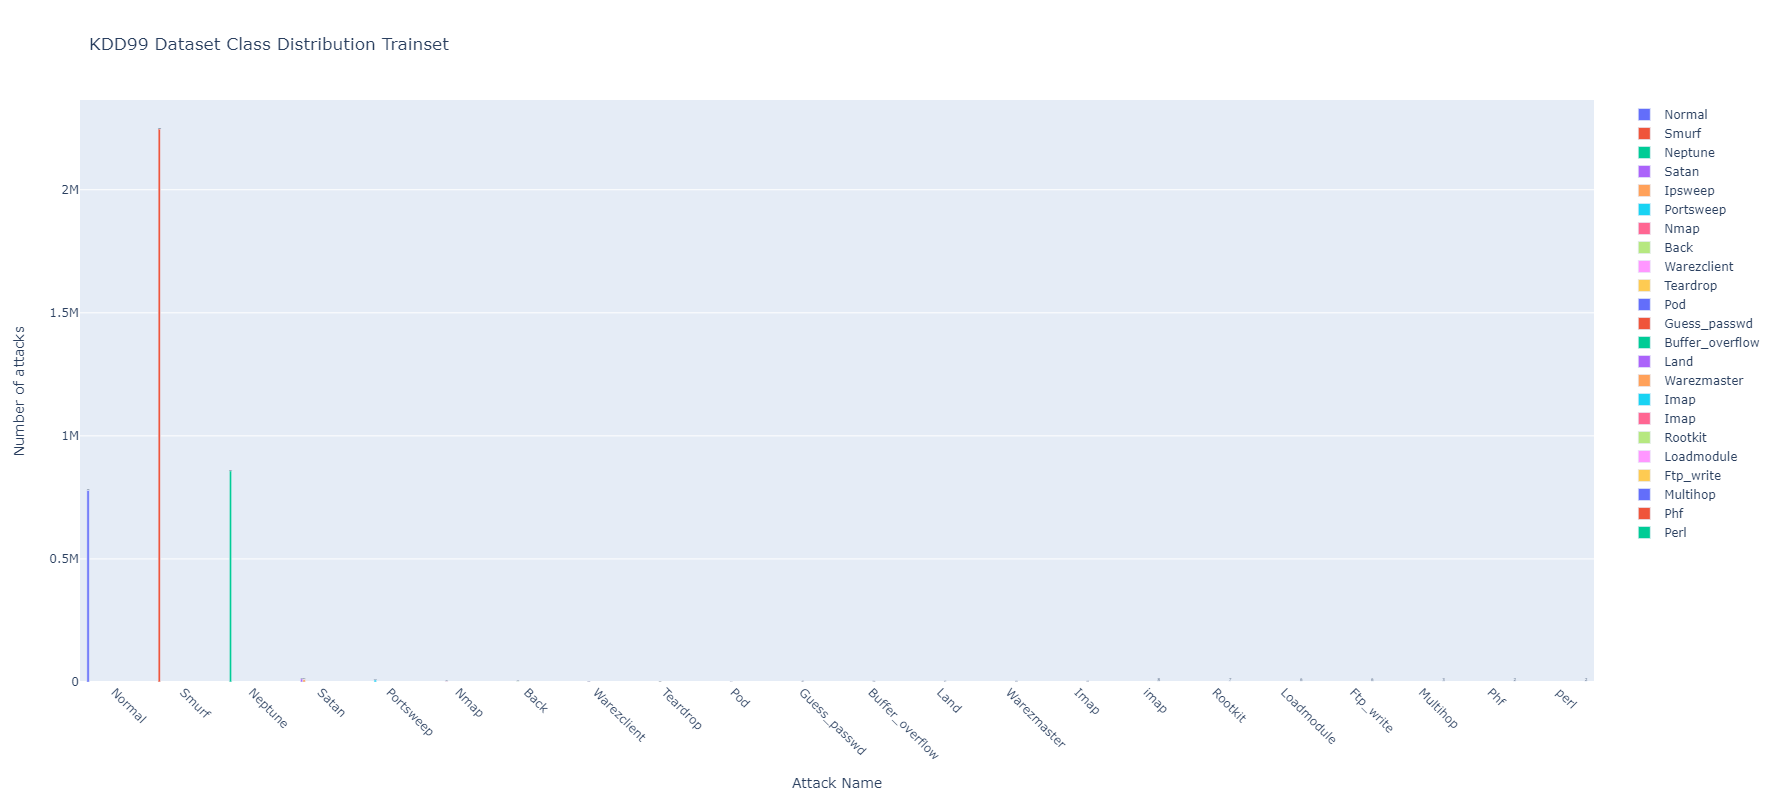

In [68]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[2:3],
           x=['Normal'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_train.value_counts().values[0:1],
           x=['Smurf'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_train.value_counts().values[1:2],
           x=['Neptune'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_train.value_counts().values[3:4],
           x=['Satan'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_train.value_counts().values[4:5],
           x=['Satan'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_train.value_counts().values[5:6],
           x=['Portsweep'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_train.value_counts().values[6:7],
           x=['Nmap'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_train.value_counts().values[7:8],
           x=['Back'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_train.value_counts().values[8:9],
           x=['Warezclient'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_train.value_counts().values[9:10],
           x=['Teardrop'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_train.value_counts().values[10:11],
           x=['Pod'],
           text = y_train.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_train.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_train.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_train.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_train.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_train.value_counts().values[13:14],
           x=['Land'],
           text = y_train.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_train.value_counts().values[14:15],
           x=['Warezmaster'],
           text = y_train.value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_train.value_counts().values[15:16],
           x=['Imap'],
           text = y_train.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_train.value_counts().values[16:17],
           x=['imap'],
           text = y_train.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_train.value_counts().values[17:18],
           x=['Rootkit'],
           text = y_train.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_train.value_counts().values[18:19],
           x=['Loadmodule'],
           text = y_train.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_train.value_counts().values[19:20],
           x=['Ftp_write'],
           text = y_train.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_train.value_counts().values[20:21],
           x=['Multihop'],
           text = y_train.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_train.value_counts().values[21:22],
           x=['Phf'],
           text = y_train.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_train.value_counts().values[22:23],
           x=['perl'],
           text = y_train.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_train.value_counts().values[23:24],
           x=['Spy'],
           text = y_train.value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1500,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [69]:
y_test.value_counts().sum()

979687

In [70]:
y_test.value_counts()

smurf.              561578
neptune.            214403
normal.             194556
satan.                3178
ipsweep.              2496
portsweep.            2083
nmap.                  463
back.                  441
warezclient.           204
teardrop.              196
pod.                    53
guess_passwd.           11
buffer_overflow.         6
land.                    4
warezmaster.             4
imap.                    2
ftp_write.               2
loadmodule.              2
rootkit.                 2
multihop.                1
phf.                     1
perl.                    1
Name: attack, dtype: int64

In [71]:
#y = np.array([2246308, 857614, 778225, 12714,9985,8330,1853,1762,816,783,211,42,24,17,16,10,8,7,6,6,3,2,2,2 ])
#mylabels = ["Normal", "Bananas", "Smurf", "Neptune", "Satan", "Ipsweep", "Portsweep", "Nmap", "Back", "Warezclient", "Teardrop", "Pod", "Guess_passwd", "Buffer_overflow", "Land", "Warezmaster", "Imap", "Rootkit", "Loadmodule", "Ftp_write", "Multihop", "Phf", "Perl", "Spy"]

#plt.pie(y, labels = mylabels)
#plt.legend(title = "Four Fruits:")
#plt.show() 

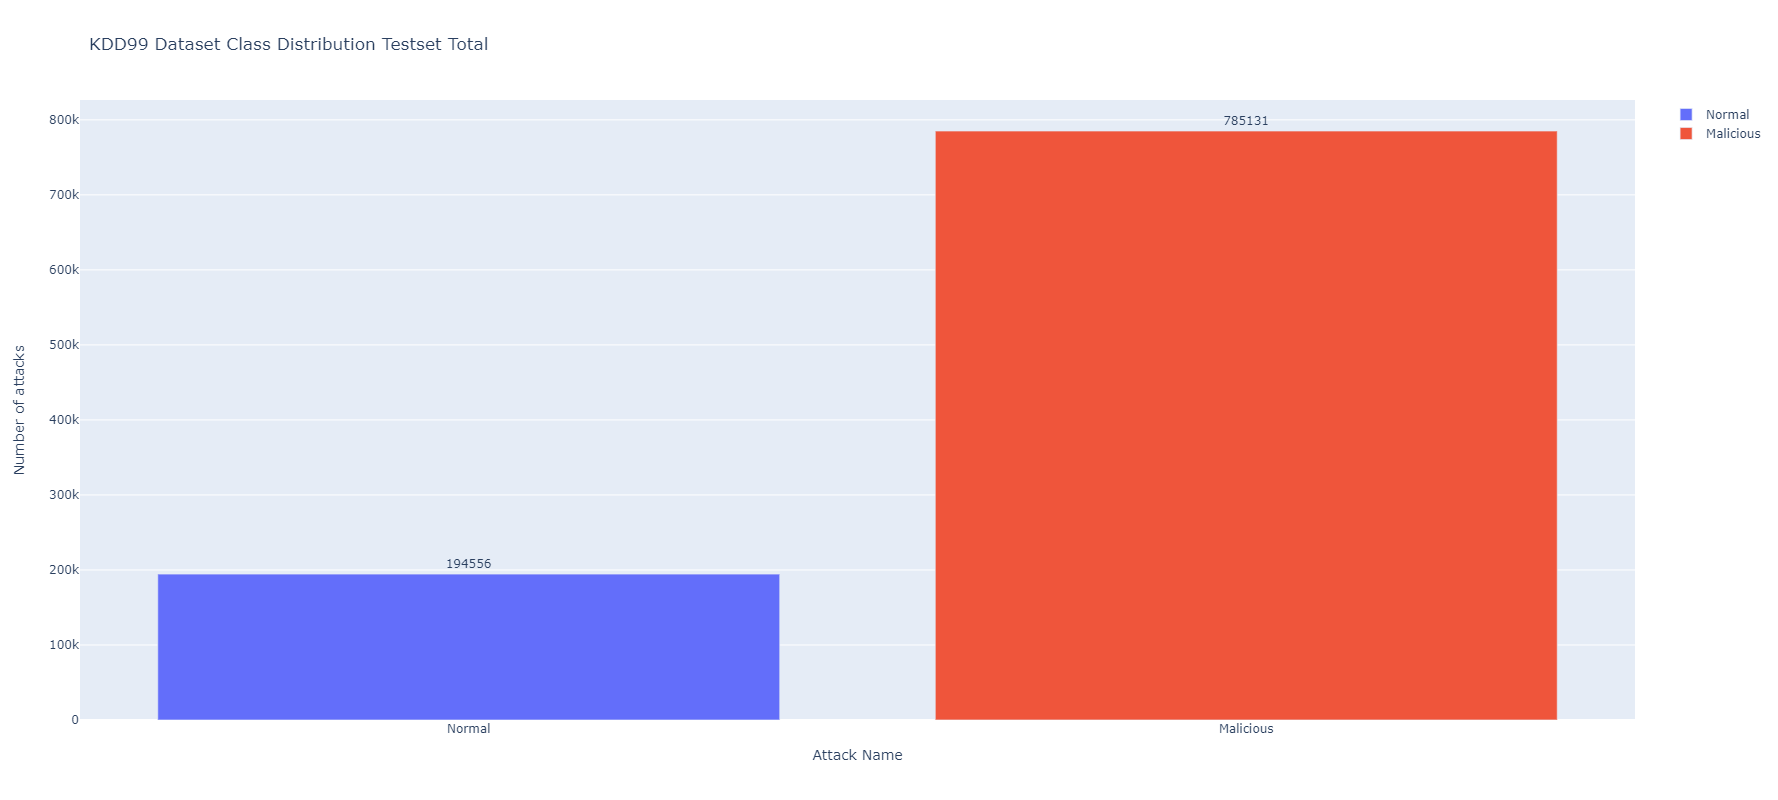

In [72]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[2:3],
           x=['Normal'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           
           y=y_test.value_counts().sum()- y_test.value_counts().values[2:3],
           x=['Malicious'],
           text = y_test.value_counts().sum() - y_test.value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution Testset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

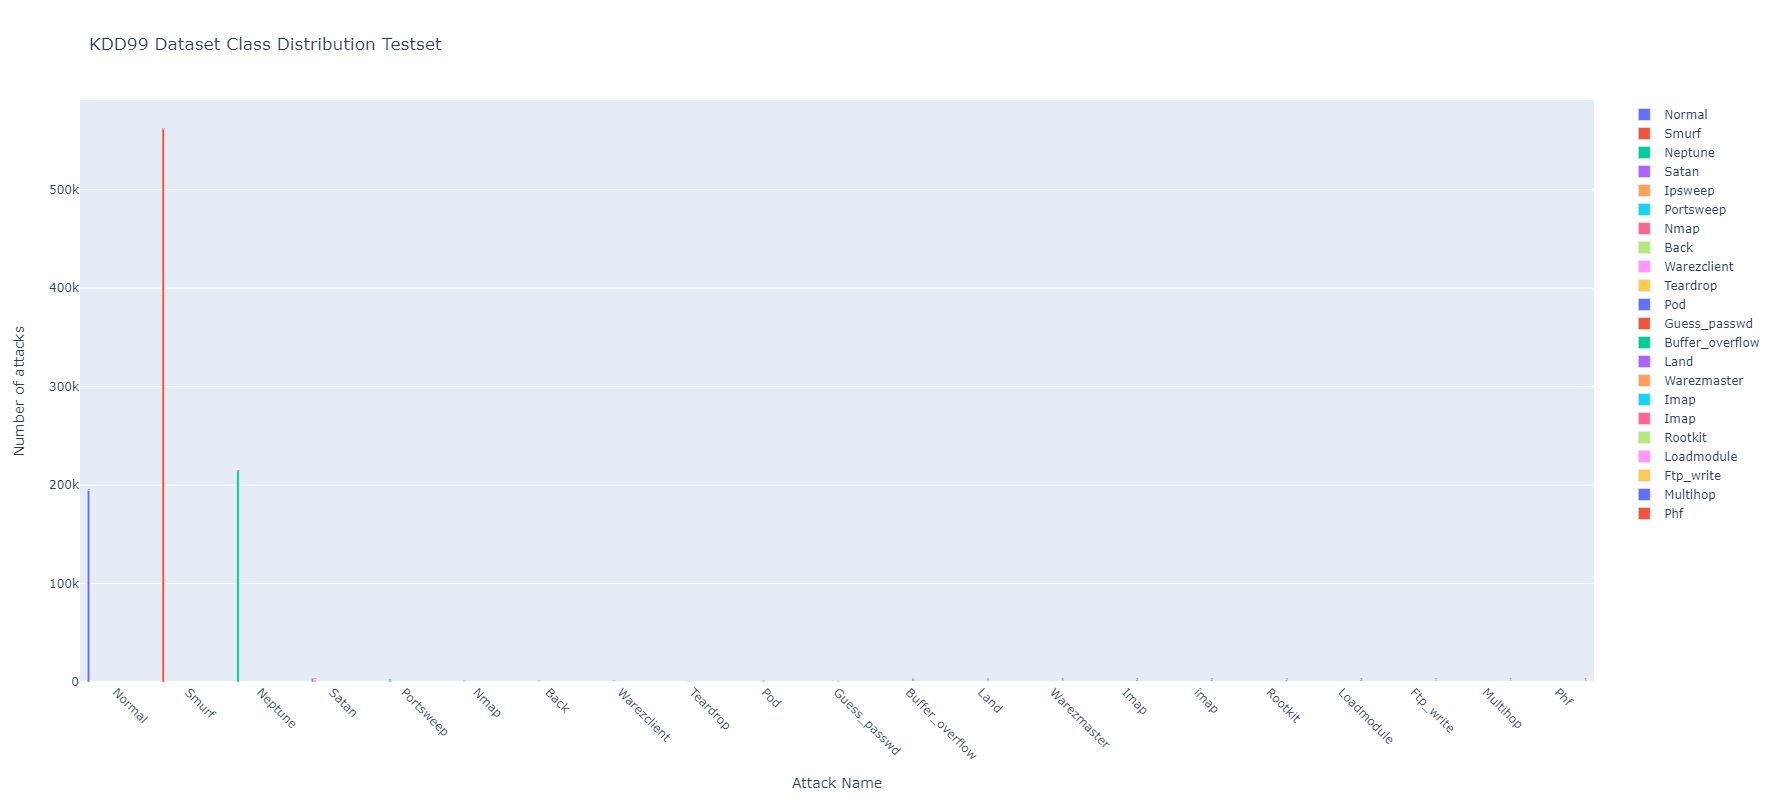

In [73]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[2:3],
           x=['Normal'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_test.value_counts().values[0:1],
           x=['Smurf'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_test.value_counts().values[1:2],
           x=['Neptune'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_test.value_counts().values[3:4],
           x=['Satan'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_test.value_counts().values[4:5],
           x=['Satan'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_test.value_counts().values[5:6],
           x=['Portsweep'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_test.value_counts().values[6:7],
           x=['Nmap'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_test.value_counts().values[7:8],
           x=['Back'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_test.value_counts().values[8:9],
           x=['Warezclient'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_test.value_counts().values[9:10],
           x=['Teardrop'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_test.value_counts().values[10:11],
           x=['Pod'],
           text = y_test.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_test.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_test.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_test.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_test.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_test.value_counts().values[13:14],
           x=['Land'],
           text = y_test.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_test.value_counts().values[14:15],
           x=['Warezmaster'],
           text = y_test.value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_test.value_counts().values[15:16],
           x=['Imap'],
           text = y_test.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_test.value_counts().values[16:17],
           x=['imap'],
           text = y_test.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_test.value_counts().values[17:18],
           x=['Rootkit'],
           text = y_test.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_test.value_counts().values[18:19],
           x=['Loadmodule'],
           text = y_test.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_test.value_counts().values[19:20],
           x=['Ftp_write'],
           text = y_test.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_test.value_counts().values[20:21],
           x=['Multihop'],
           text = y_test.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_test.value_counts().values[21:22],
           x=['Phf'],
           text = y_test.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_test.value_counts().values[22:23],
           x=['perl'],
           text = y_test.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_test.value_counts().values[23:24],
           x=['Spy'],
           text = y_test.value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

Accuracy of DT: 0.9999285486078717
Precision of DT: 0.9999335072212476
Recall of DT: 0.9999285486078717
F1-score of DT: 0.9999303423727534
                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       441
buffer_overflow.       0.75      0.50      0.60         6
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      0.82      0.90        11
           imap.       0.00      0.00      0.00         2
        ipsweep.       1.00      1.00      1.00      2496
           land.       0.50      1.00      0.67         4
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00    214403
           nmap.       1.00      0.99      0.99       463
         normal.       1.00      1.00      1.00    194556
           perl.       1.00      1.00      1.00         1
            phf.       1.00      1.00      1.00 

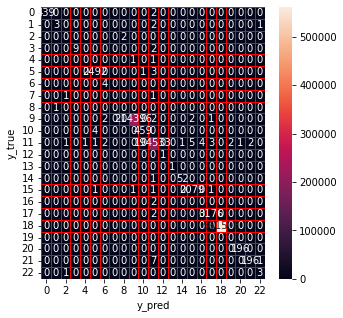

In [74]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [75]:
df,df_models = train_test_split(df, train_size = 0.9, test_size = 0.1, random_state = 0, stratify = df.iloc[:,-1])
df=df_models
del df_models

In [76]:
print(df.info())
print("-------------------------------------------")
print(df.head(5))
print("-------------------------------------------")
print(df.dtypes[df.dtypes == object])
print("-------------------------------------------")
print(df['attack'].value_counts())
print("-------------------------------------------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489844 entries, 2590706 to 1632882
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     489844 non-null  int64  
 1   protocol_type                489844 non-null  int8   
 2   service                      489844 non-null  int8   
 3   flag                         489844 non-null  int8   
 4   src_bytes                    489844 non-null  int64  
 5   dst_bytes                    489844 non-null  int64  
 6   land                         489844 non-null  int64  
 7   wrong_fragment               489844 non-null  int64  
 8   urgent                       489844 non-null  int64  
 9   hot                          489844 non-null  int64  
 10  num_failed_logins            489844 non-null  int64  
 11  logged_in                    489844 non-null  int64  
 12  num_compromised              489844 non-null  int64

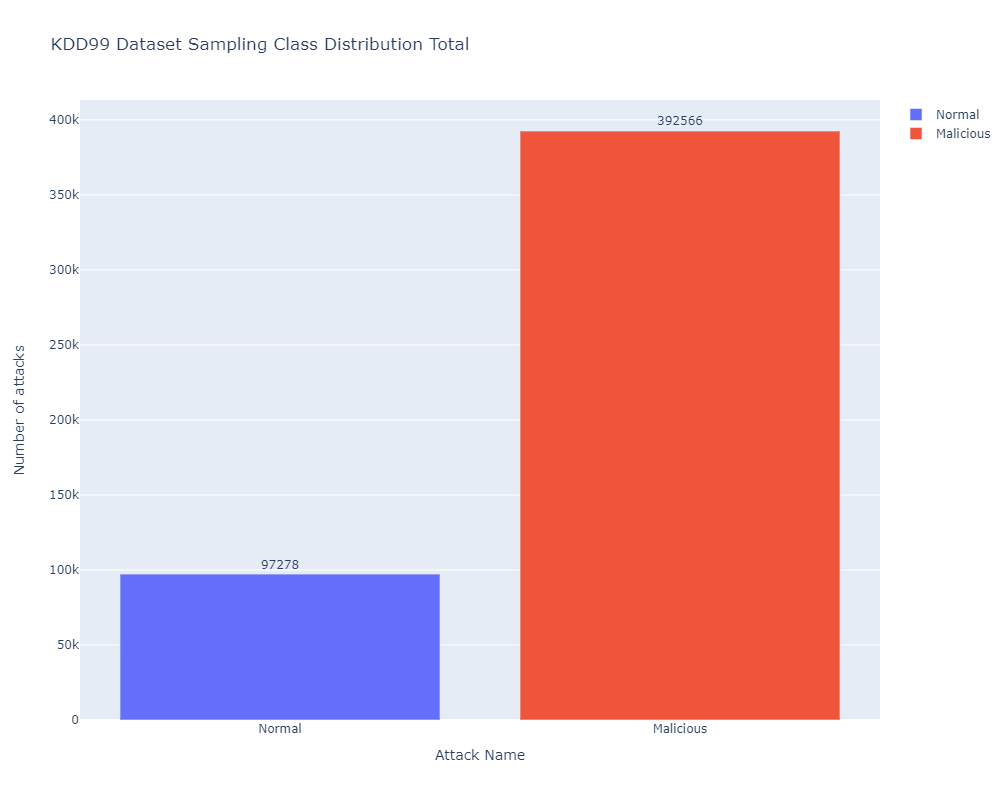

In [77]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=df.iloc[:,-1].value_counts().sum()- df.iloc[:,-1].value_counts().values[2:3],
           x=['Malicious'],
           text = df.iloc[:,-1].value_counts().sum() - df.iloc[:,-1].value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Sampling Class Distribution Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

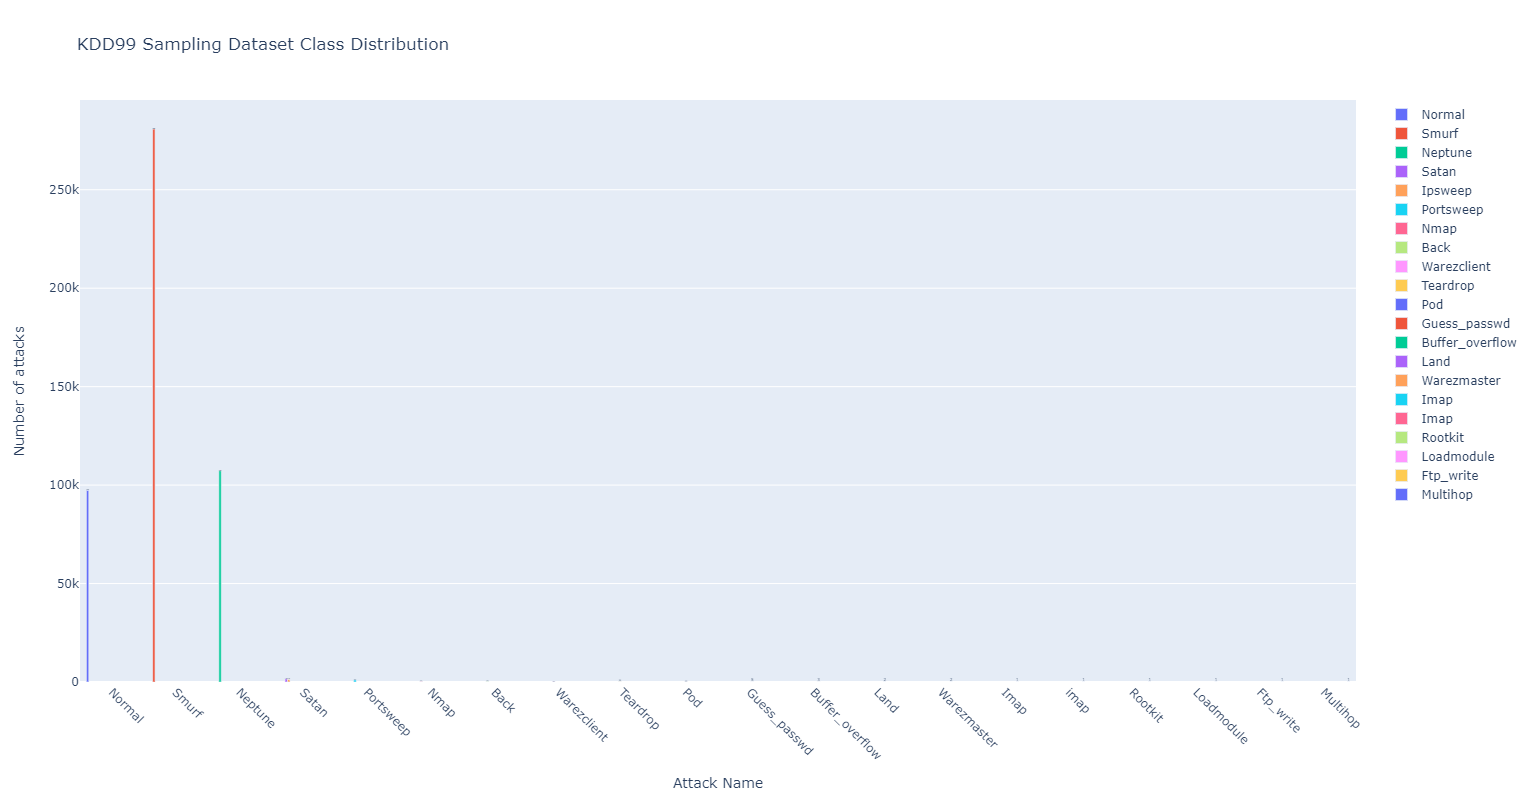

In [78]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Smurf'],
           text = df.iloc[:,-1].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=df.iloc[:,-1].value_counts().values[1:2],
           x=['Neptune'],
           text = df.iloc[:,-1].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=df.iloc[:,-1].value_counts().values[3:4],
           x=['Satan'],
           text = df.iloc[:,-1].value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=df.iloc[:,-1].value_counts().values[4:5],
           x=['Satan'],
           text = df.iloc[:,-1].value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=df.iloc[:,-1].value_counts().values[5:6],
           x=['Portsweep'],
           text = df.iloc[:,-1].value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=df.iloc[:,-1].value_counts().values[6:7],
           x=['Nmap'],
           text = df.iloc[:,-1].value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=df.iloc[:,-1].value_counts().values[7:8],
           x=['Back'],
           text = df.iloc[:,-1].value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=df.iloc[:,-1].value_counts().values[8:9],
           x=['Warezclient'],
           text = df.iloc[:,-1].value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=df.iloc[:,-1].value_counts().values[9:10],
           x=['Teardrop'],
           text = df.iloc[:,-1].value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=df.iloc[:,-1].value_counts().values[10:11],
           x=['Pod'],
           text = df.iloc[:,-1].value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=df.iloc[:,-1].value_counts().values[11:12],
           x=['Guess_passwd'],
           text = df.iloc[:,-1].value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=df.iloc[:,-1].value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = df.iloc[:,-1].value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=df.iloc[:,-1].value_counts().values[13:14],
           x=['Land'],
           text = df.iloc[:,-1].value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=df.iloc[:,-1].value_counts().values[14:15],
           x=['Warezmaster'],
           text = df.iloc[:,-1].value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=df.iloc[:,-1].value_counts().values[15:16],
           x=['Imap'],
           text = df.iloc[:,-1].value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=df.iloc[:,-1].value_counts().values[16:17],
           x=['imap'],
           text = df.iloc[:,-1].value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=df.iloc[:,-1].value_counts().values[17:18],
           x=['Rootkit'],
           text = df.iloc[:,-1].value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=df.iloc[:,-1].value_counts().values[18:19],
           x=['Loadmodule'],
           text = df.iloc[:,-1].value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=df.iloc[:,-1].value_counts().values[19:20],
           x=['Ftp_write'],
           text = df.iloc[:,-1].value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=df.iloc[:,-1].value_counts().values[20:21],
           x=['Multihop'],
           text = df.iloc[:,-1].value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=df.iloc[:,-1].value_counts().values[21:22],
           x=['Phf'],
           text = df.iloc[:,-1].value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=df.iloc[:,-1].value_counts().values[22:23],
           x=['perl'],
           text = df.iloc[:,-1].value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=df.iloc[:,-1].value_counts().values[23:24],
           x=['Spy'],
           text = df.iloc[:,-1].value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Sampling Dataset Class Distribution ',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [79]:
X=df.iloc[:,:40]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [80]:
y_train.value_counts().sum()

391875

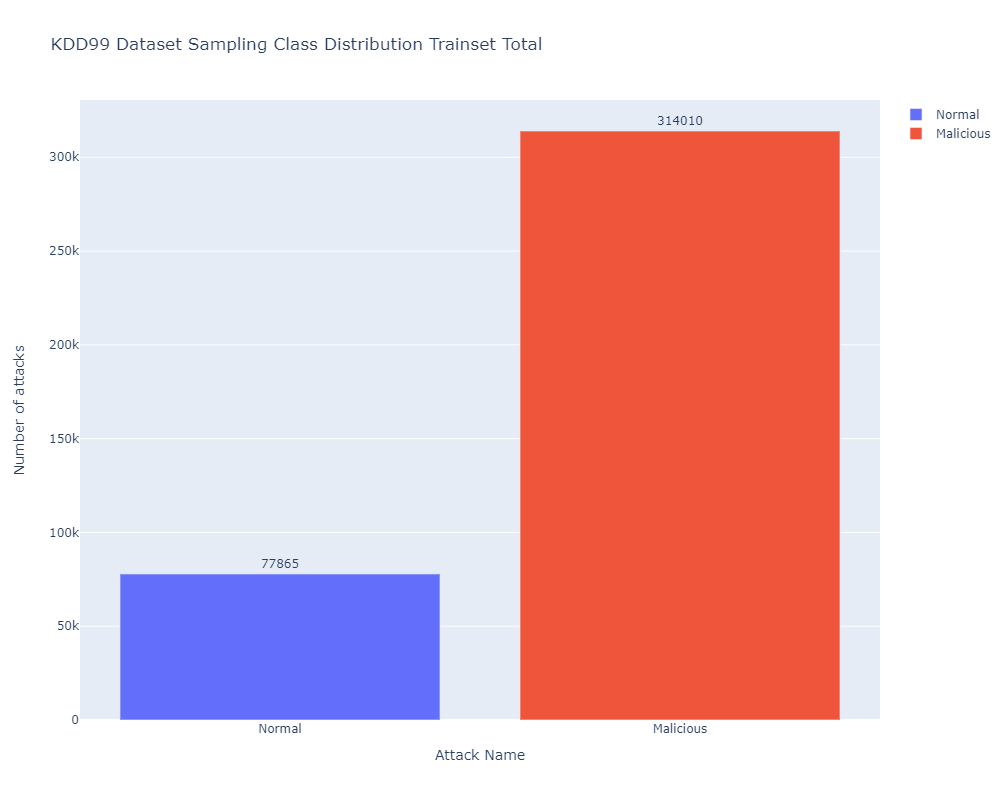

In [81]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[2:3],
           x=['Normal'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_train.value_counts().sum()- y_train.value_counts().values[2:3],
           x=['Malicious'],
           text = y_train.value_counts().sum() - y_train.value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Sampling Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

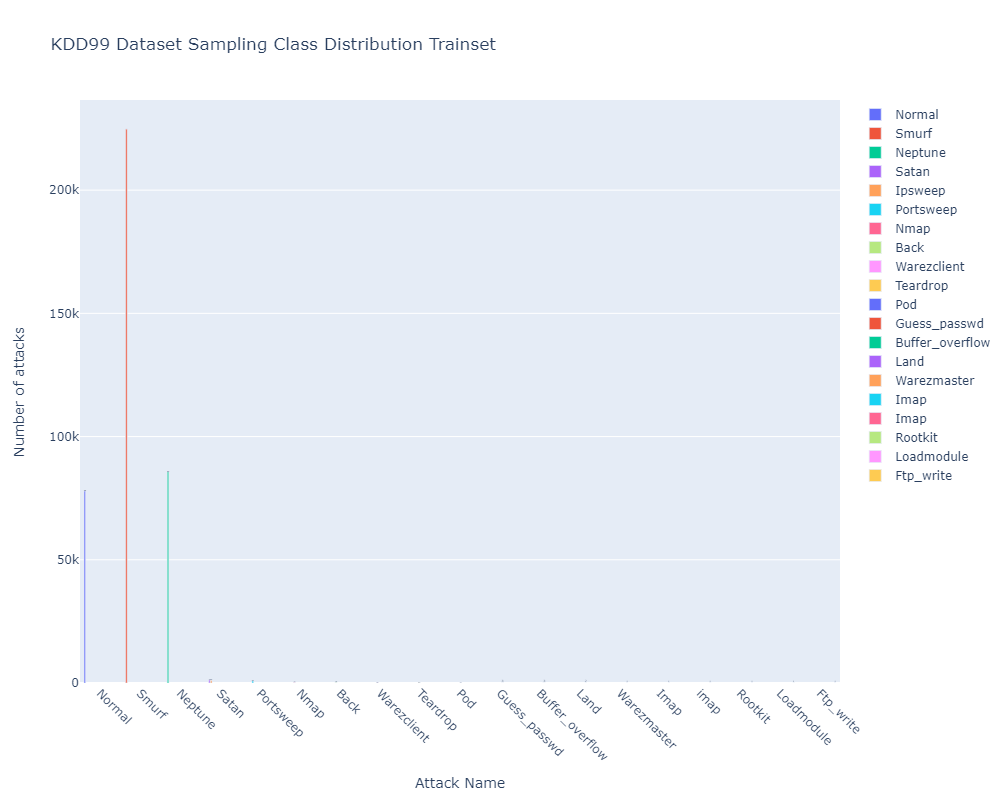

In [82]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[2:3],
           x=['Normal'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_train.value_counts().values[0:1],
           x=['Smurf'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_train.value_counts().values[1:2],
           x=['Neptune'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_train.value_counts().values[3:4],
           x=['Satan'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_train.value_counts().values[4:5],
           x=['Satan'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_train.value_counts().values[5:6],
           x=['Portsweep'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_train.value_counts().values[6:7],
           x=['Nmap'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_train.value_counts().values[7:8],
           x=['Back'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_train.value_counts().values[8:9],
           x=['Warezclient'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_train.value_counts().values[9:10],
           x=['Teardrop'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_train.value_counts().values[10:11],
           x=['Pod'],
           text = y_train.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_train.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_train.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_train.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_train.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_train.value_counts().values[13:14],
           x=['Land'],
           text = y_train.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_train.value_counts().values[14:15],
           x=['Warezmaster'],
           text = y_train.value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_train.value_counts().values[15:16],
           x=['Imap'],
           text = y_train.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_train.value_counts().values[16:17],
           x=['imap'],
           text = y_train.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_train.value_counts().values[17:18],
           x=['Rootkit'],
           text = y_train.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_train.value_counts().values[18:19],
           x=['Loadmodule'],
           text = y_train.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_train.value_counts().values[19:20],
           x=['Ftp_write'],
           text = y_train.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_train.value_counts().values[20:21],
           x=['Multihop'],
           text = y_train.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_train.value_counts().values[21:22],
           x=['Phf'],
           text = y_train.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_train.value_counts().values[22:23],
           x=['perl'],
           text = y_train.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_train.value_counts().values[23:24],
           x=['Spy'],
           text = y_train.value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1500,
                  height=800,
                  title=f'KDD99 Dataset Sampling Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [86]:
y_test.value_counts().sum()

97969

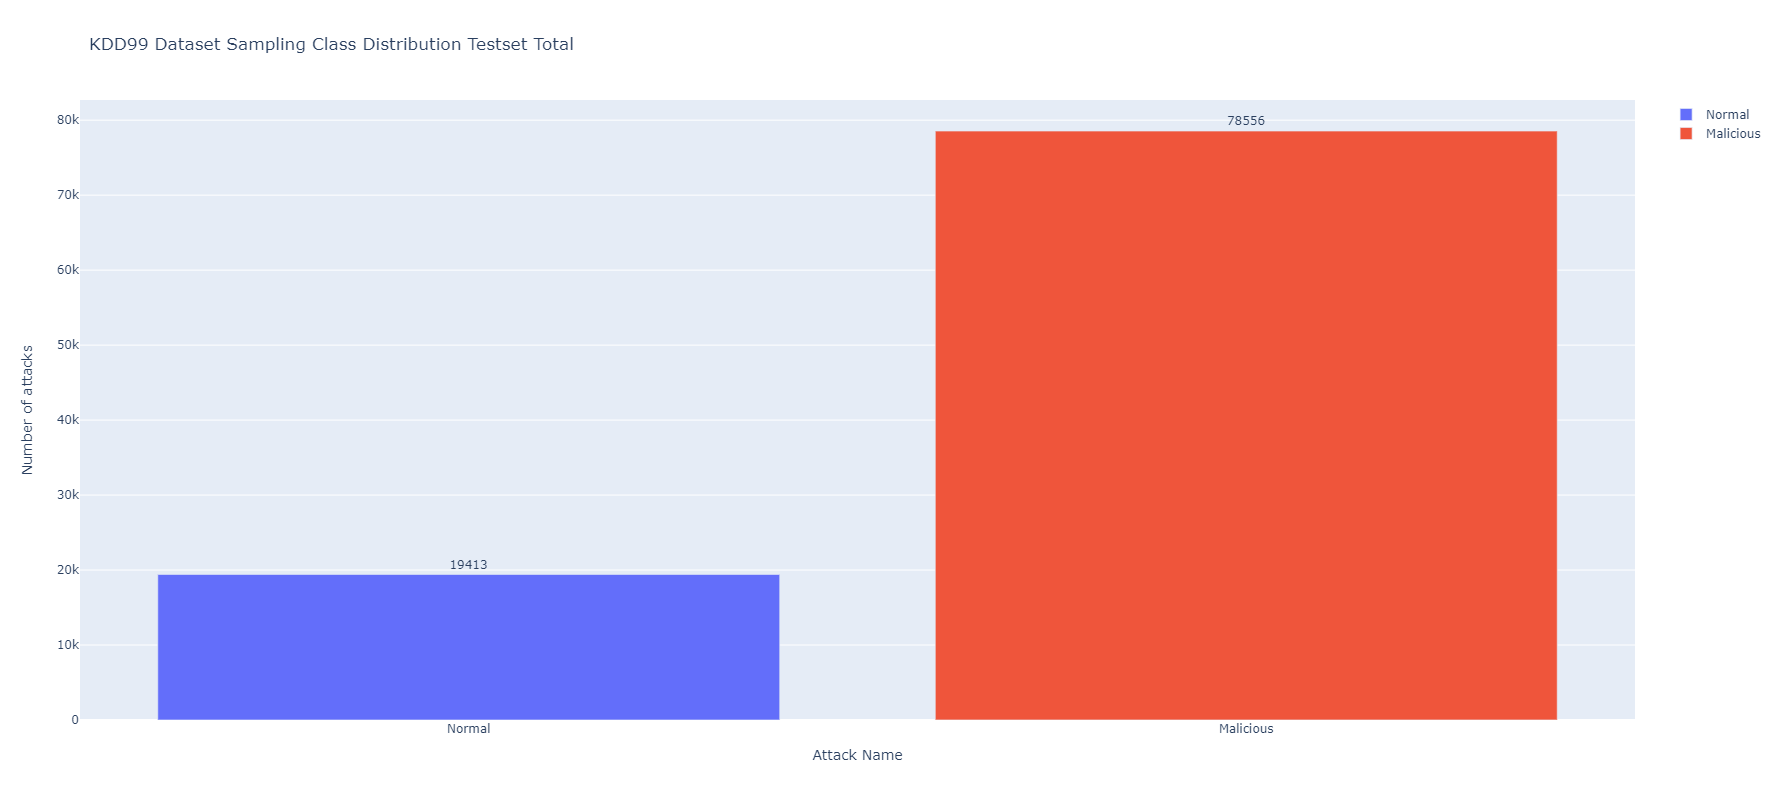

In [87]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[2:3],
           x=['Normal'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           
           y=y_test.value_counts().sum()- y_test.value_counts().values[2:3],
           x=['Malicious'],
           text = y_test.value_counts().sum() - y_test.value_counts().values[2:3],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'KDD99 Dataset Sampling Class Distribution Testset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

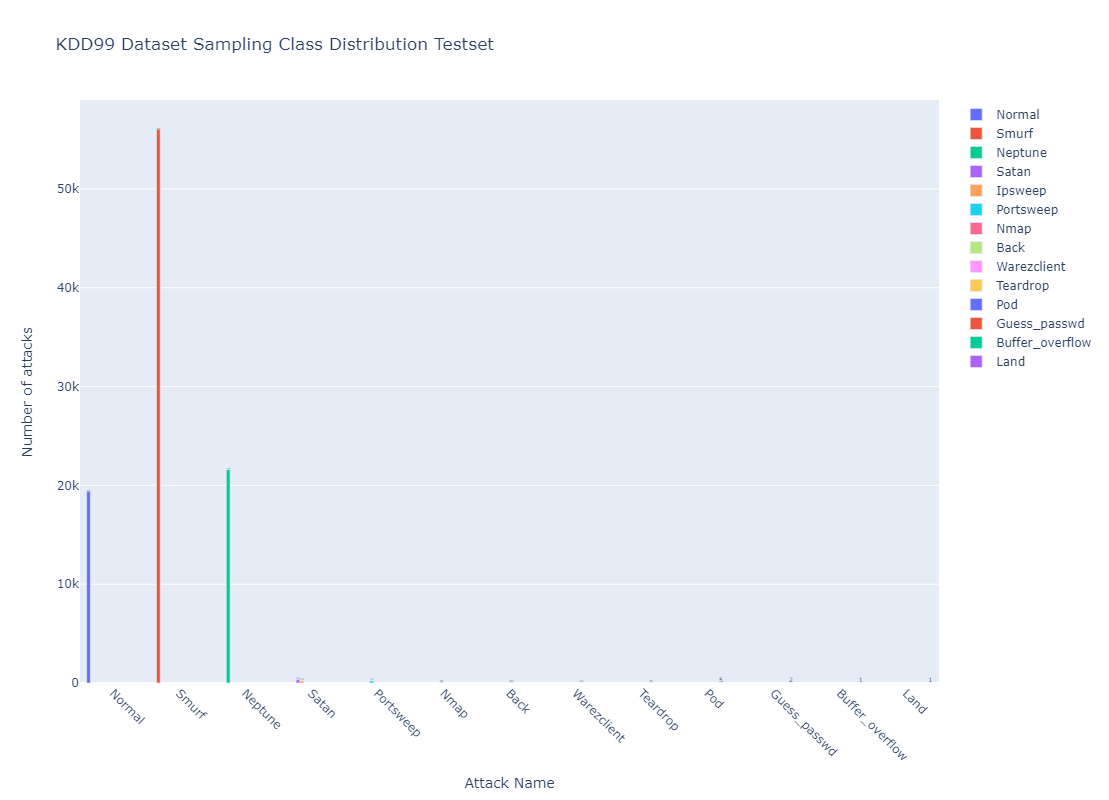

In [88]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[2:3],
           x=['Normal'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_test.value_counts().values[0:1],
           x=['Smurf'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_test.value_counts().values[1:2],
           x=['Neptune'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_test.value_counts().values[3:4],
           x=['Satan'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_test.value_counts().values[4:5],
           x=['Satan'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_test.value_counts().values[5:6],
           x=['Portsweep'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_test.value_counts().values[6:7],
           x=['Nmap'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_test.value_counts().values[7:8],
           x=['Back'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_test.value_counts().values[8:9],
           x=['Warezclient'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_test.value_counts().values[9:10],
           x=['Teardrop'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_test.value_counts().values[10:11],
           x=['Pod'],
           text = y_test.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_test.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_test.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_test.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_test.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_test.value_counts().values[13:14],
           x=['Land'],
           text = y_test.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_test.value_counts().values[14:15],
           x=['Warezmaster'],
           text = y_test.value_counts()[14:15],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_test.value_counts().values[15:16],
           x=['Imap'],
           text = y_test.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Imap', 
           y=y_test.value_counts().values[16:17],
           x=['imap'],
           text = y_test.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_test.value_counts().values[17:18],
           x=['Rootkit'],
           text = y_test.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_test.value_counts().values[18:19],
           x=['Loadmodule'],
           text = y_test.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_test.value_counts().values[19:20],
           x=['Ftp_write'],
           text = y_test.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_test.value_counts().values[20:21],
           x=['Multihop'],
           text = y_test.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_test.value_counts().values[21:22],
           x=['Phf'],
           text = y_test.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_test.value_counts().values[22:23],
           x=['perl'],
           text = y_test.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_test.value_counts().values[23:24],
           x=['Spy'],
           text = y_test.value_counts()[23:24],
           orientation='v',
           textposition='outside',),
])
# Change the bar mode
fig.update_layout(
                  width=1500,
                  height=800,
                  title=f'KDD99 Dataset Sampling Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [ ]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

# NSL-KDD

In [ ]:
#del df_train, df_test

In [3]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
  
df_train=pd.read_csv(NSL_KDD_train_path, sep=",", names=datacols)
df_test=pd.read_csv(NSL_KDD_test_path, sep=",", names=datacols)

In [4]:

print(df_train.info())
print("-------------------------------------------")
print(df_train.head(5))
print("-------------------------------------------")
print(df_train.dtypes[df_train.dtypes == object])
print("-------------------------------------------")
print(df_train['attack'].value_counts())
print("-------------------------------------------")
print(df_train.isnull().sum())

print("###########################################") 

print(df_test.info())
print("-------------------------------------------")
print(df_test.head(5))
print("-------------------------------------------")
print(df_test.dtypes[df_test.dtypes == object])
print("-------------------------------------------")
print(df_test['attack'].value_counts())
print(df_test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

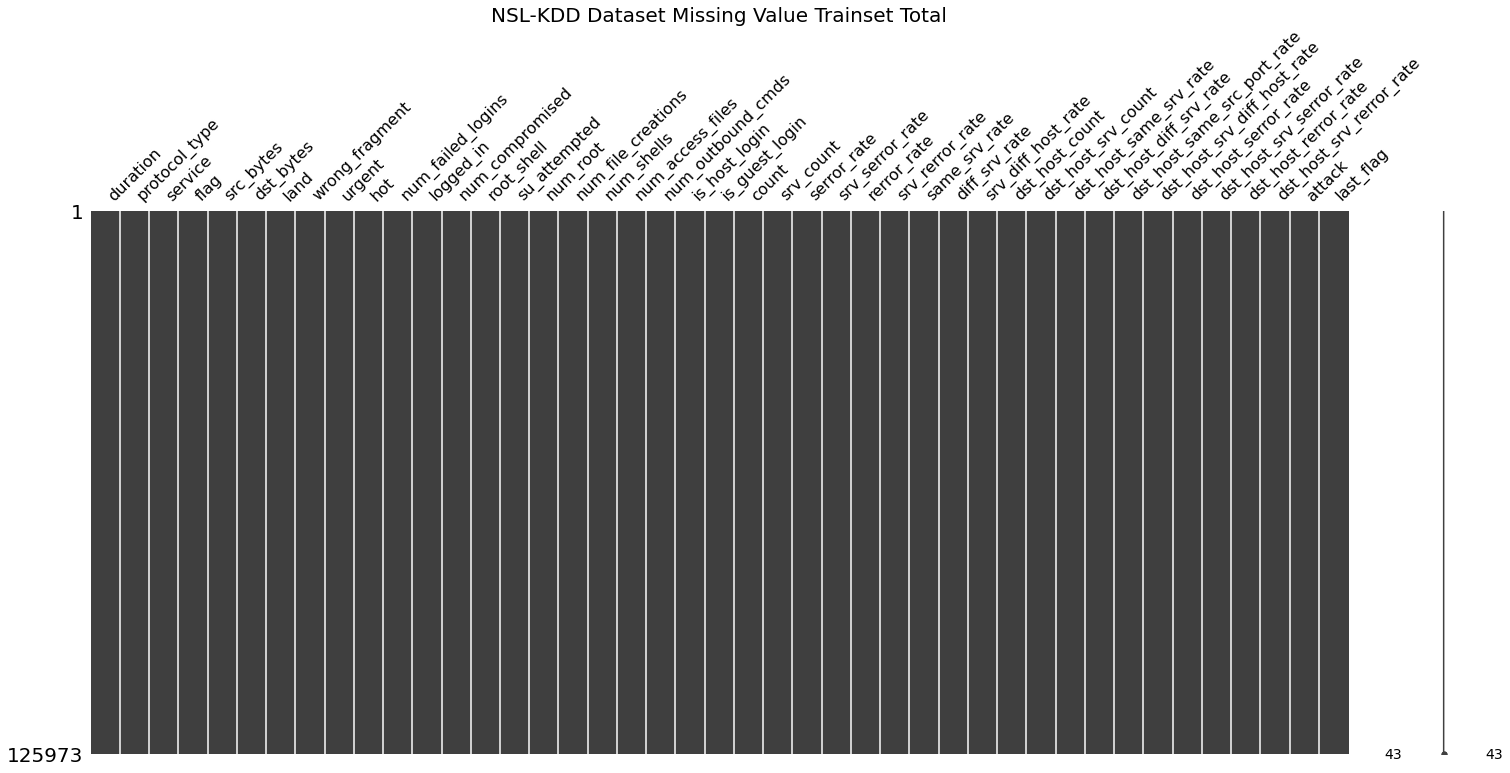

In [10]:
#missing value
msno.matrix(df_train)
plt.title("NSL-KDD Dataset Missing Value Trainset Total", fontsize = 20)
plt.show()

                             duration  src_bytes  dst_bytes  land  wrong_fragment  urgent   hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  last_flag
duration                         1.00       0.07       0.03 -0.00           -0.01    0.00  0.00               0.01      -0.06             0.04        0.05          0.09      0.05                0.10       -0.00              0.07                NaN          -0.00            0.00  -0.08      -0.04        -0.07            -0.07         0.20     

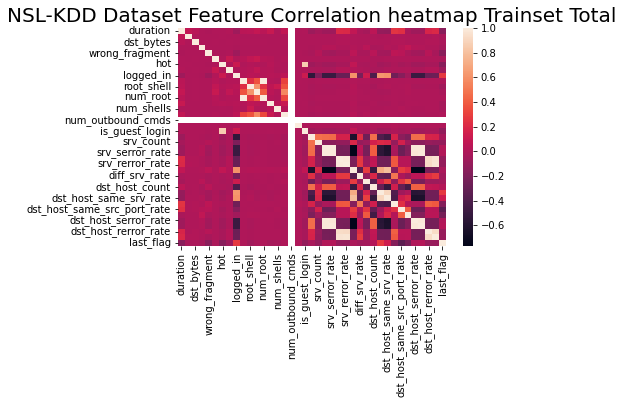

In [11]:
print(df_train.corr())
  
# plotting correlation heatmap
plt.title("NSL-KDD Dataset Feature Correlation heatmap Trainset Total", fontsize = 20)
ax = sns.heatmap(df_train.corr())
plt.show()

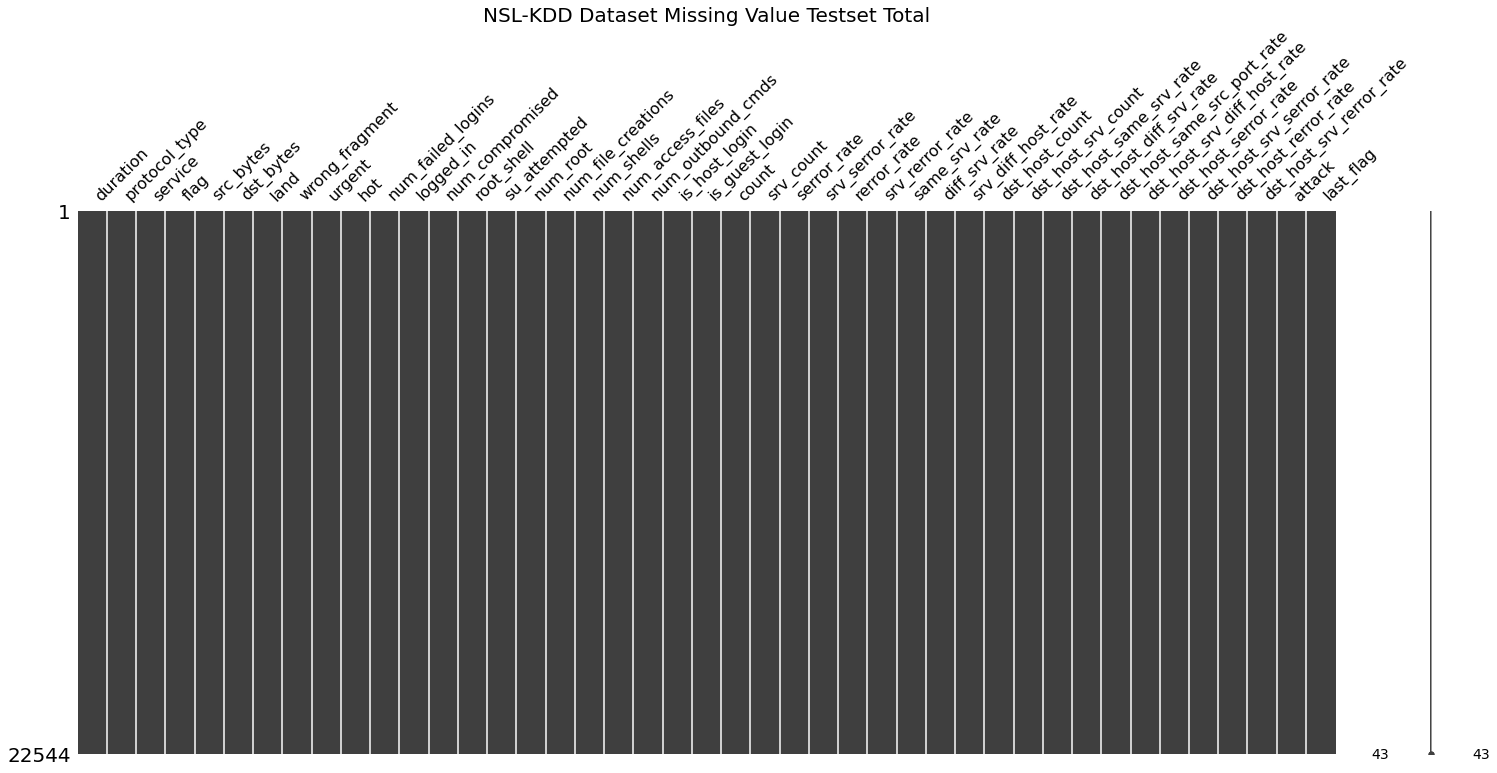

In [12]:
#missing value
msno.matrix(df_test)
plt.title("NSL-KDD Dataset Missing Value Testset Total", fontsize = 20)
plt.show()

                             duration  src_bytes  dst_bytes  land  wrong_fragment  urgent   hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  last_flag
duration                         1.00       0.00       0.08 -0.00           -0.01   -0.00 -0.00              -0.02      -0.08             0.10        0.02          0.09      0.10                0.00        0.00              0.02                NaN          -0.00            0.00  -0.09      -0.05        -0.02            -0.03        -0.04     

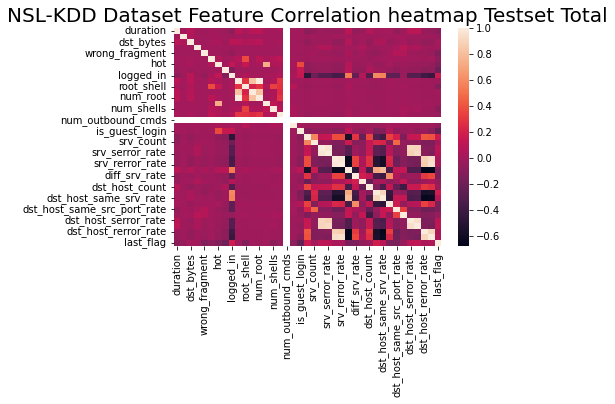

In [13]:
print(df_test.corr())
  
# plotting correlation heatmap
plt.title("NSL-KDD Dataset Feature Correlation heatmap Testset Total", fontsize = 20)
ax = sns.heatmap(df_test.corr())
plt.show()

In [6]:
#drop unwanted column lasted flag 
df_train = df_train.iloc[:,:-1]
df_test = df_test.iloc[:,:-1]

In [7]:
X_train = df_train.iloc[:,:40]
y_train = df_train.iloc[:,-1]

X_test = df_test.iloc[:,:40]
y_test = df_test.iloc[:,-1]

In [8]:
y_train.value_counts().sum()

125973

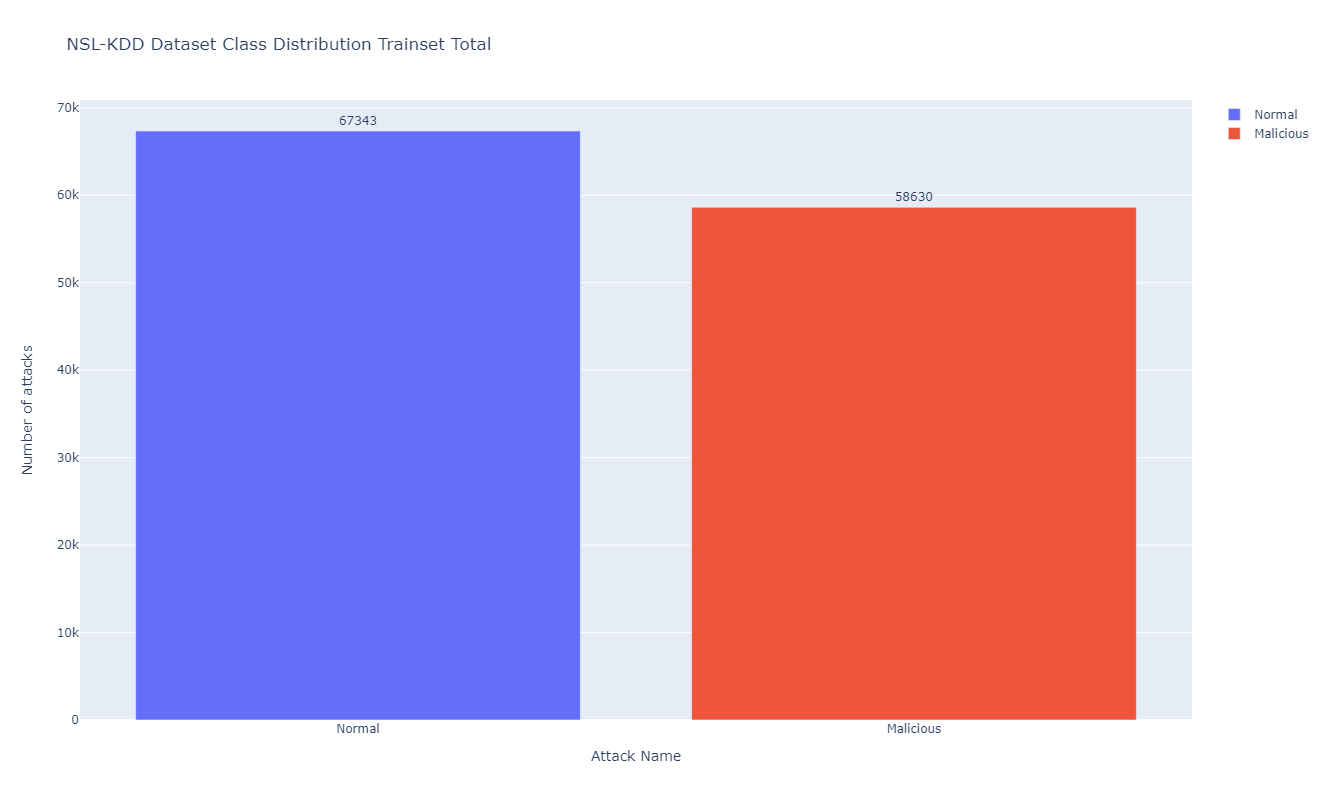

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_train.value_counts().sum()- y_train.value_counts().values[0:1],
           x=['Malicious'],
           text = y_train.value_counts().sum() - y_train.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'NSL-KDD Dataset Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

In [51]:
y_train.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

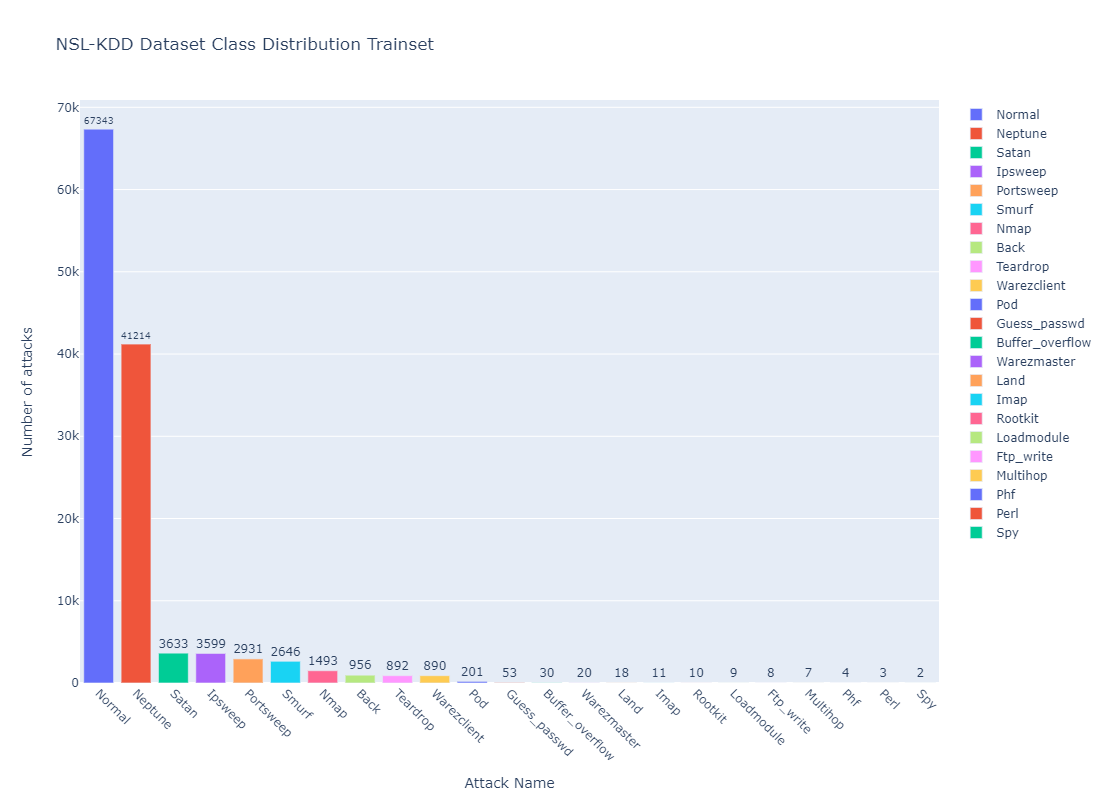

In [19]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_train.value_counts().values[1:2],
           x=['Neptune'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_train.value_counts().values[2:3],
           x=['Satan'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_train.value_counts().values[3:4],
           x=['Ipsweep'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_train.value_counts().values[4:5],
           x=['Portsweep'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_train.value_counts().values[5:6],
           x=['Smurf'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_train.value_counts().values[6:7],
           x=['Nmap'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_train.value_counts().values[7:8],
           x=['Back'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_train.value_counts().values[8:9],
           x=['Teardrop'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_train.value_counts().values[9:10],
           x=['Warezclient'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_train.value_counts().values[10:11],
           x=['Pod'],
           text = y_train.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_train.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_train.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_train.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_train.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_train.value_counts().values[13:14],
           x=['Warezmaster'],
           text = y_train.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_train.value_counts().values[14:15],
           x=['Land'],
           text = y_train.value_counts()[14:15],
           orientation='v',
           textposition='outside',),    
    go.Bar(name='Imap', 
           y=y_train.value_counts().values[15:16],
           x=['Imap'],
           text = y_train.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_train.value_counts().values[16:17],
           x=['Rootkit'],
           text = y_train.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_train.value_counts().values[17:18],
           x=['Loadmodule'],
           text = y_train.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_train.value_counts().values[18:19],
           x=['Ftp_write'],
           text = y_train.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_train.value_counts().values[19:20],
           x=['Multihop'],
           text = y_train.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_train.value_counts().values[20:21],
           x=['Phf'],
           text = y_train.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_train.value_counts().values[21:22],
           x=['Perl'],
           text = y_train.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_train.value_counts().values[22:23],
           x=['Spy'],
           text = y_train.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    
])
# Change the bar mode
fig.update_layout(
                  width=1500,
                  height=800,
                  title=f'NSL-KDD Dataset Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [50]:
y_test.value_counts().sum()

22544

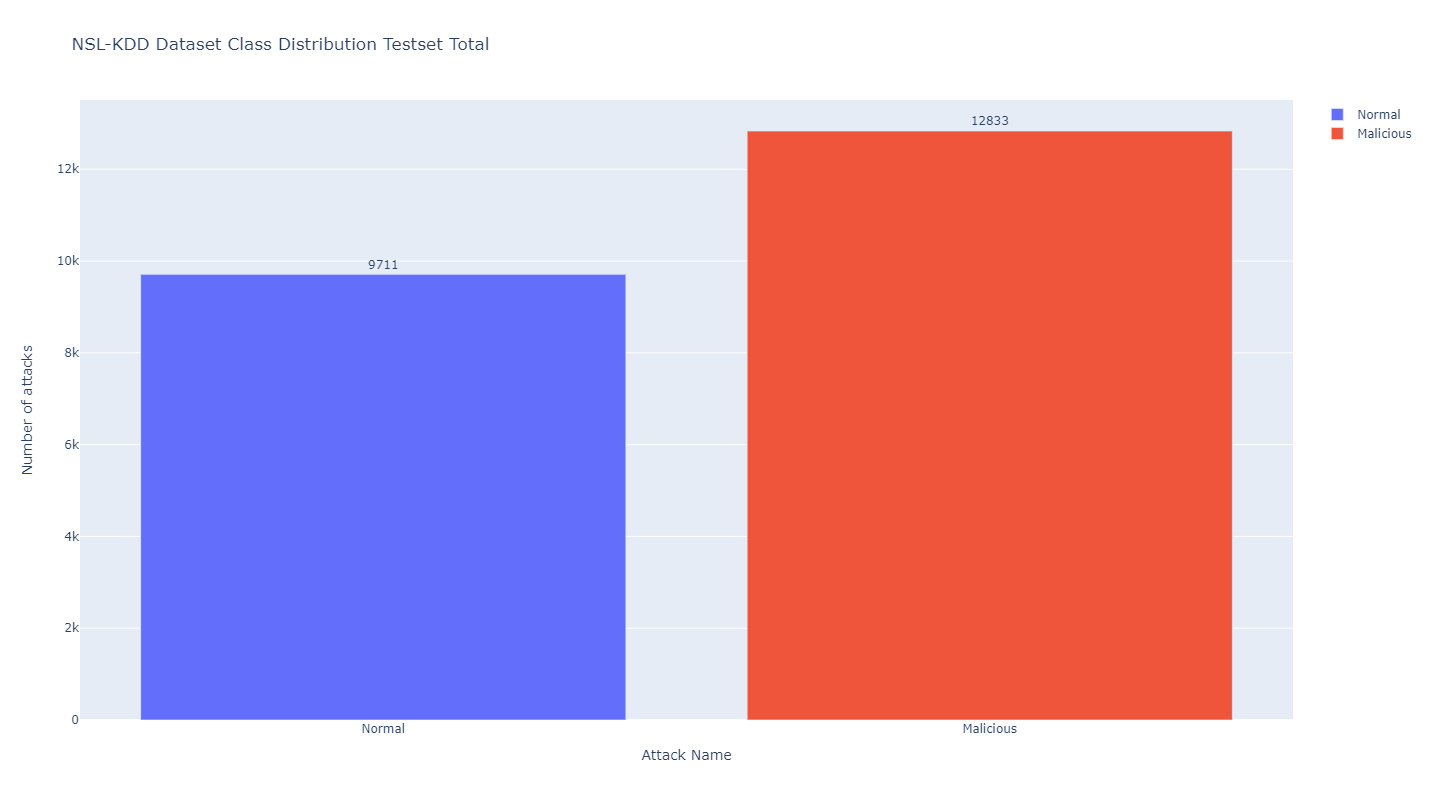

In [21]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_test.value_counts().sum()- y_test.value_counts().values[0:1],
           x=['Malicious'],
           text = y_test.value_counts().sum() - y_test.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'NSL-KDD Dataset Class Distribution Testset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [9]:
y_test.value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

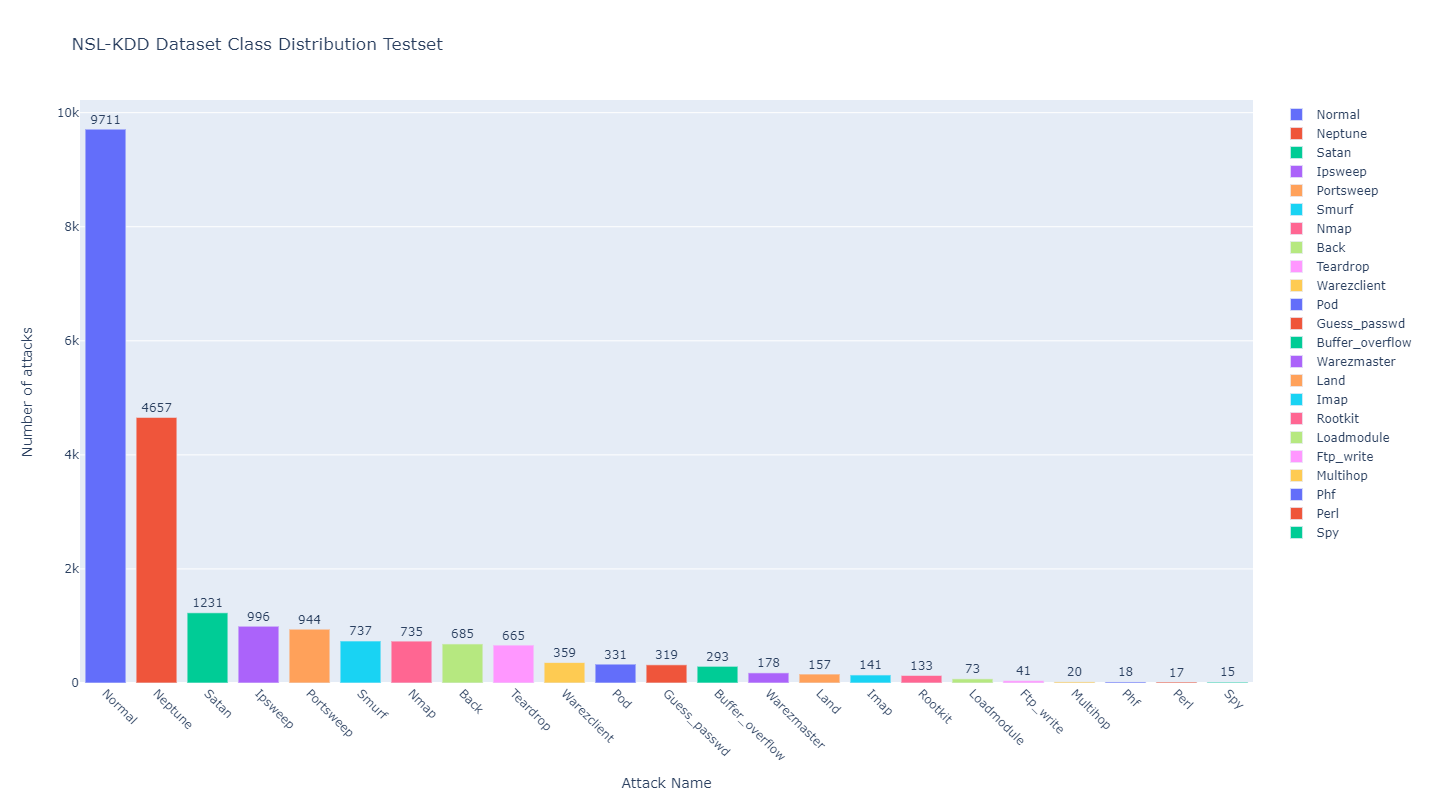

In [22]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Neptune', 
           y=y_test.value_counts().values[1:2],
           x=['Neptune'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Satan', 
           y=y_test.value_counts().values[2:3],
           x=['Satan'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ipsweep', 
           y=y_test.value_counts().values[3:4],
           x=['Ipsweep'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Portsweep', 
           y=y_test.value_counts().values[4:5],
           x=['Portsweep'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Smurf', 
           y=y_test.value_counts().values[5:6],
           x=['Smurf'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Nmap', 
           y=y_test.value_counts().values[6:7],
           x=['Nmap'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Back', 
           y=y_test.value_counts().values[7:8],
           x=['Back'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Teardrop', 
           y=y_test.value_counts().values[8:9],
           x=['Teardrop'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezclient', 
           y=y_test.value_counts().values[9:10],
           x=['Warezclient'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Pod', 
           y=y_test.value_counts().values[10:11],
           x=['Pod'],
           text = y_test.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Guess_passwd', 
           y=y_test.value_counts().values[11:12],
           x=['Guess_passwd'],
           text = y_test.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Buffer_overflow', 
           y=y_test.value_counts().values[12:13],
           x=['Buffer_overflow'],
           text = y_test.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Warezmaster', 
           y=y_test.value_counts().values[13:14],
           x=['Warezmaster'],
           text = y_test.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Land', 
           y=y_test.value_counts().values[14:15],
           x=['Land'],
           text = y_test.value_counts()[14:15],
           orientation='v',
           textposition='outside',),    
    go.Bar(name='Imap', 
           y=y_test.value_counts().values[15:16],
           x=['Imap'],
           text = y_test.value_counts()[15:16],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Rootkit', 
           y=y_test.value_counts().values[16:17],
           x=['Rootkit'],
           text = y_test.value_counts()[16:17],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Loadmodule', 
           y=y_test.value_counts().values[17:18],
           x=['Loadmodule'],
           text = y_test.value_counts()[17:18],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Ftp_write', 
           y=y_test.value_counts().values[18:19],
           x=['Ftp_write'],
           text = y_test.value_counts()[18:19],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Multihop', 
           y=y_test.value_counts().values[19:20],
           x=['Multihop'],
           text = y_test.value_counts()[19:20],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Phf', 
           y=y_test.value_counts().values[20:21],
           x=['Phf'],
           text = y_test.value_counts()[20:21],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Perl', 
           y=y_test.value_counts().values[21:22],
           x=['Perl'],
           text = y_test.value_counts()[21:22],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Spy', 
           y=y_test.value_counts().values[22:23],
           x=['Spy'],
           text = y_test.value_counts()[22:23],
           orientation='v',
           textposition='outside',),
    
])
# Change the bar mode
fig.update_layout(
                  width=1500,
                  height=800,
                  title=f'NSL-KDD Dataset Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)
iplot(fig)

In [29]:
for i in ['protocol_type',"service","flag"]:
    X_train[i] = X_train[i].astype('category').cat.codes
    X_test[i] = X_test[i].astype('category').cat.codes

Accuracy of DT: 0.7105660042583393
Precision of DT: 0.613880608766923
Recall of DT: 0.7105660042583393
F1-score of DT: 0.6207886003773828
                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.99      0.45      0.62       359
buffer_overflow       0.67      0.20      0.31        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       1.00      0.02      0.04      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.97      1.00      0.98       141
           land       0.88      1.00      0.93         7
     loadmodule       1.00      0.50      0.67         2
       mailbomb       0.00      0.00      0.00       293
          mscan       0.00      0.00      0.00       996
       multihop       0.00      0.00      0.00        18
          named       0.00      0.00      0.00        17
      

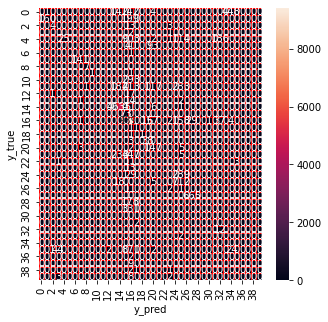

In [30]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test )
print(models)

# CIC-IDS2017

In [41]:
del X_train,y_train, X_test, y_test, df

In [6]:
df1=pd.read_csv(CICIDS_df1_path)
df2=pd.read_csv(CICIDS_df2_path)
df3=pd.read_csv(CICIDS_df3_path)
df4=pd.read_csv(CICIDS_df4_path)
df5=pd.read_csv(CICIDS_df5_path)
df6=pd.read_csv(CICIDS_df6_path)
df7=pd.read_csv(CICIDS_df7_path)
df8=pd.read_csv(CICIDS_df8_path)

df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

In [7]:
print(df.info())
print("-------------------------------------------")
print(df.head(5))
print("-------------------------------------------")
print(df.dtypes[df.dtypes == object])
print("-------------------------------------------")
print(df.iloc[:,-1].value_counts())
print("-------------------------------------------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

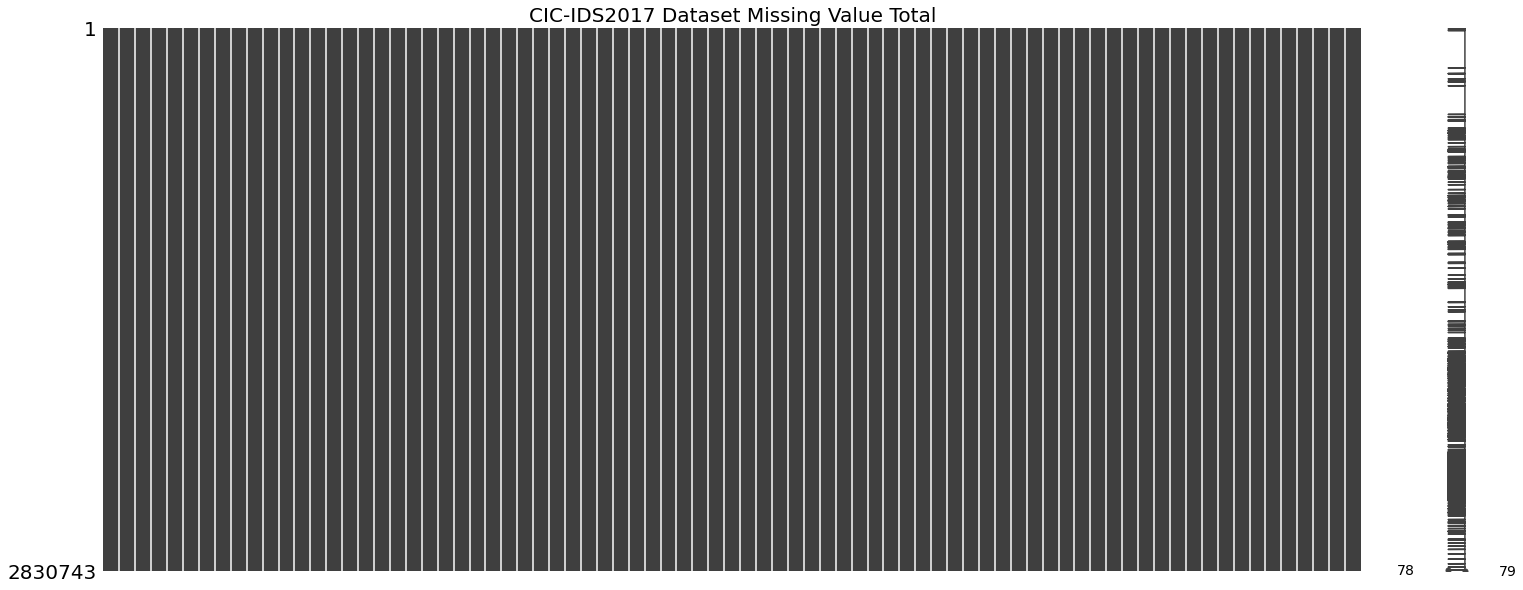

In [9]:
#missing value
msno.matrix(df)
plt.title("CIC-IDS2017 Dataset Missing Value Total", fontsize = 20)
plt.show()

                               Destination Port   Flow Duration   Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets   Total Length of Bwd Packets   Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean   Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags   Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  Fwd Packets/s   Bwd Packets/s   Min Packet Length   Max Packet Length   Packet Length Mean   Packet Length Std   Packet Length Variance  FIN Flag Count   SYN Flag Count   RST Flag Count   PSH Flag Count   ACK Flag Count   URG Flag Count   CWE Flag Count   ECE Flag Count   Down/Up Ratio   Average Pa

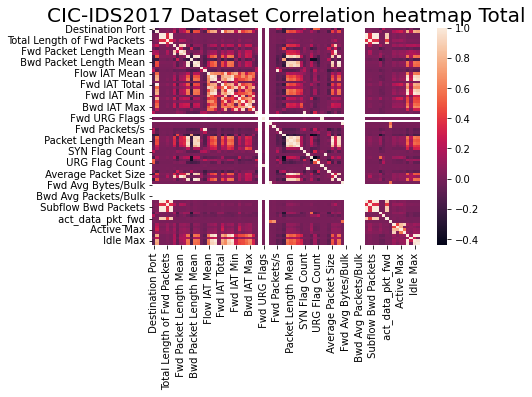

In [10]:
print(df.corr())
# plotting correlation heatmap
plt.title("CIC-IDS2017 Dataset Correlation heatmap Total", fontsize = 20)
ax = sns.heatmap(df.corr())
plt.show()

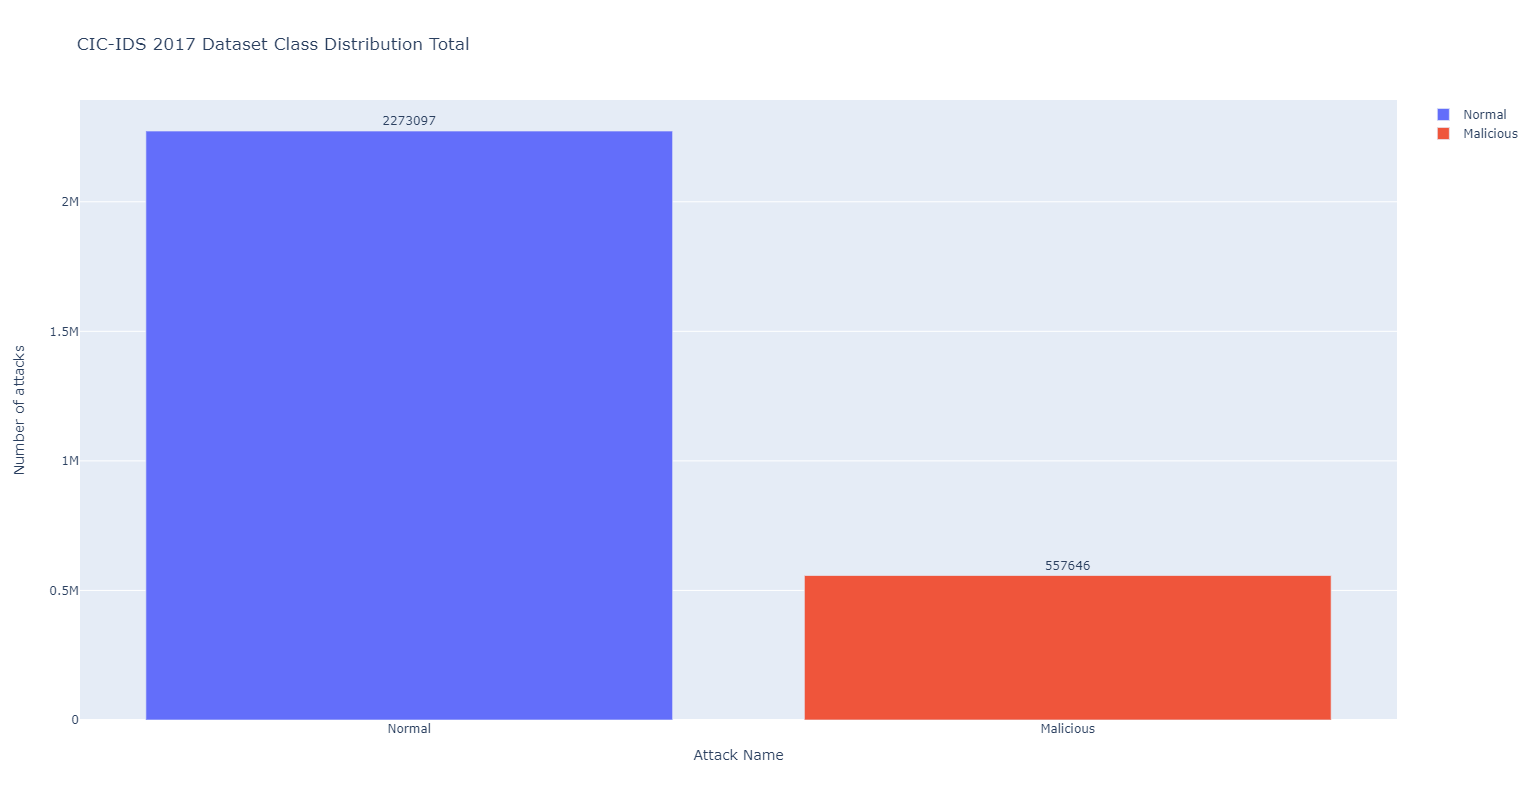

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=df.iloc[:,-1].value_counts().sum()- df.iloc[:,-1].value_counts().values[0:1],
           x=['Malicious'],
           text = df.iloc[:,-1].value_counts().sum() - df.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

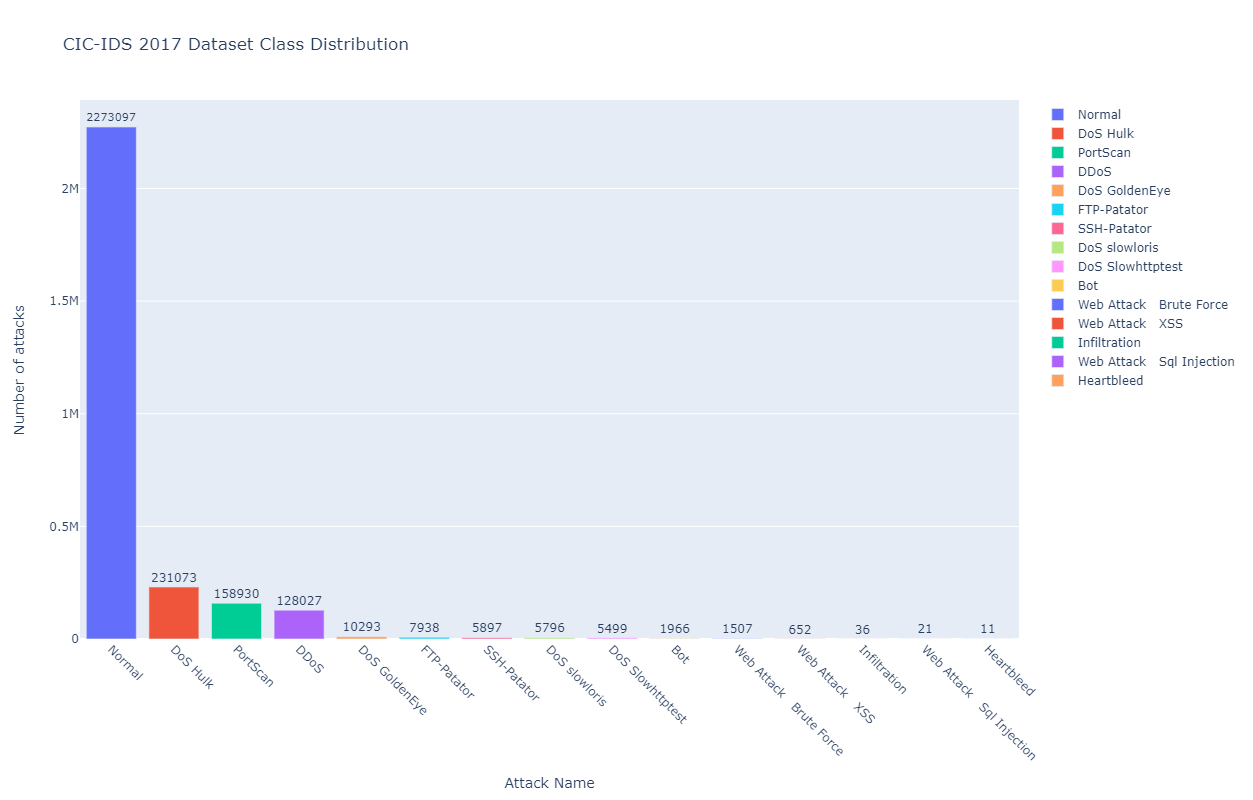

In [20]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=df.iloc[:,-1].value_counts().values[1:2],
           x=['DoS Hulk'],
           text = df.iloc[:,-1].value_counts().values[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['PortScan'],
           text = df.iloc[:,-1].value_counts().values[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=df.iloc[:,-1].value_counts().values[3:4],
           x=['DDoS'],
           text = df.iloc[:,-1].value_counts().values[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=df.iloc[:,-1].value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = df.iloc[:,-1].value_counts().values[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=df.iloc[:,-1].value_counts().values[5:6],
           x=['FTP-Patator'],
           text = df.iloc[:,-1].value_counts().values[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=df.iloc[:,-1].value_counts().values[6:7],
           x=['SSH-Patator'],
           text = df.iloc[:,-1].value_counts().values[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=df.iloc[:,-1].value_counts().values[7:8],
           x=['DoS slowloris'],
           text = df.iloc[:,-1].value_counts().values[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=df.iloc[:,-1].value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = df.iloc[:,-1].value_counts().values[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=df.iloc[:,-1].value_counts().values[9:10],
           x=['Bot'],
           text = df.iloc[:,-1].value_counts().values[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=df.iloc[:,-1].value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = df.iloc[:,-1].value_counts().values[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=df.iloc[:,-1].value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = df.iloc[:,-1].value_counts().values[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=df.iloc[:,-1].value_counts().values[12:13],
           x=['Infiltration'],
           text = df.iloc[:,-1].value_counts().values[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=df.iloc[:,-1].value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = df.iloc[:,-1].value_counts().values[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=df.iloc[:,-1].value_counts().values[14:15],
           x=['Heartbleed'],
           text = df.iloc[:,-1].value_counts().values[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
)                  

iplot(fig)

In [21]:
X=df.iloc[:,:77]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify=df.iloc[:,-1])
print(len(X_train),len(y_train),len(X_test),len(y_test))

2264594 2264594 566149 566149


In [22]:
df.iloc[:,-1].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [23]:
print(y_train.value_counts())
print("---------------------------")
print(y_test.value_counts())

BENIGN                        1818477
DoS Hulk                       184858
PortScan                       127144
DDoS                           102421
DoS GoldenEye                    8234
FTP-Patator                      6350
SSH-Patator                      4718
DoS slowloris                    4637
DoS Slowhttptest                 4399
Bot                              1573
Web Attack � Brute Force         1206
Web Attack � XSS                  522
Infiltration                       29
Web Attack � Sql Injection         17
Heartbleed                          9
Name:  Label, dtype: int64
---------------------------
BENIGN                        454620
DoS Hulk                       46215
PortScan                       31786
DDoS                           25606
DoS GoldenEye                   2059
FTP-Patator                     1588
SSH-Patator                     1179
DoS slowloris                   1159
DoS Slowhttptest                1100
Bot                              393
Web A

In [24]:
y_train.value_counts().sum()

2264594

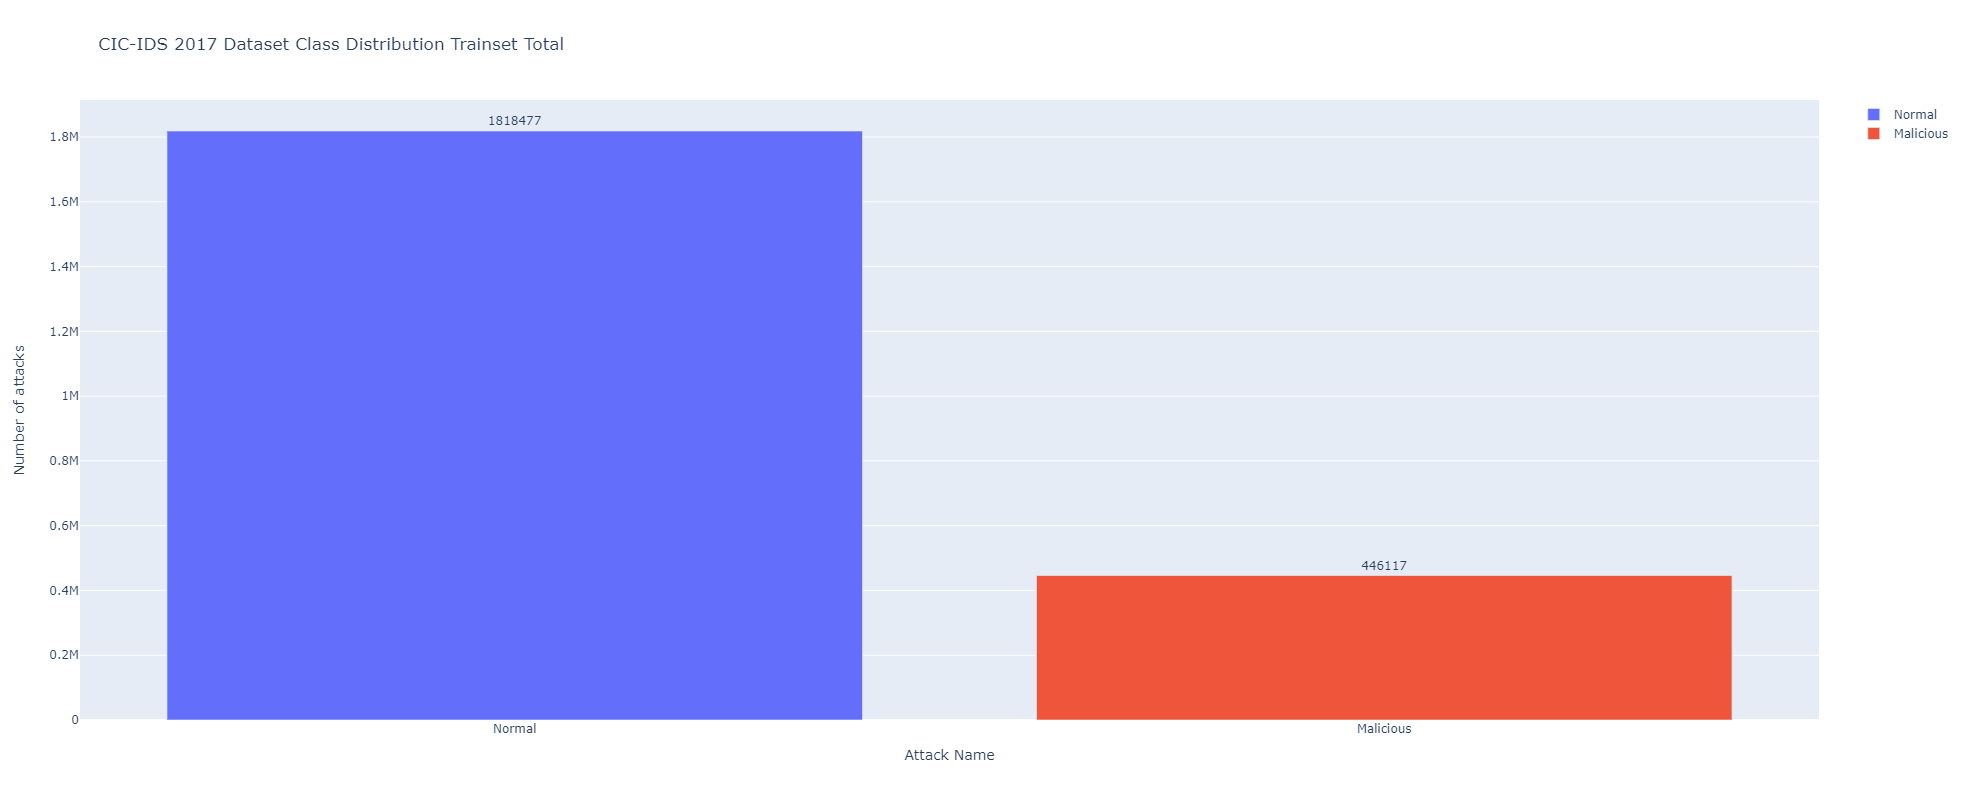

In [26]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_train.value_counts().sum()- y_train.value_counts().values[0:1],
           x=['Malicious'],
           text = y_train.value_counts().sum() - y_train.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

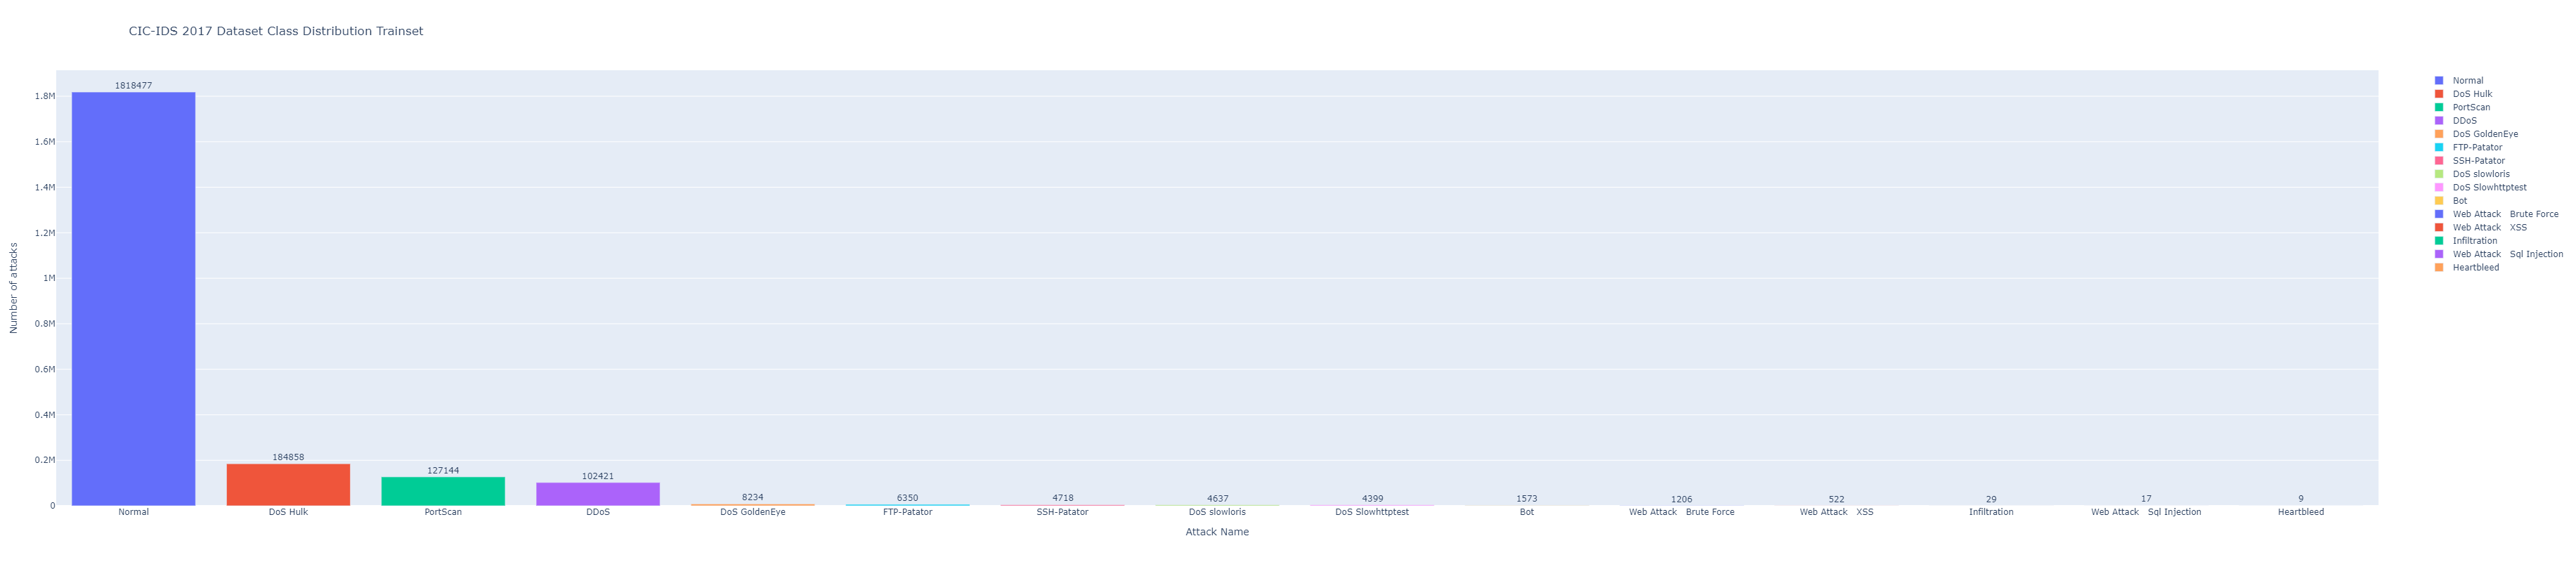

In [27]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=y_train.value_counts().values[1:2],
           x=['DoS Hulk'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=y_train.value_counts().values[2:3],
           x=['PortScan'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=y_train.value_counts().values[3:4],
           x=['DDoS'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=y_train.value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=y_train.value_counts().values[5:6],
           x=['FTP-Patator'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=y_train.value_counts().values[6:7],
           x=['SSH-Patator'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=y_train.value_counts().values[7:8],
           x=['DoS slowloris'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=y_train.value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=y_train.value_counts().values[9:10],
           x=['Bot'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=y_train.value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = y_train.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=y_train.value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = y_train.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=y_train.value_counts().values[12:13],
           x=['Infiltration'],
           text = y_train.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=y_train.value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = y_train.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=y_train.value_counts().values[14:15],
           x=['Heartbleed'],
           text = y_train.value_counts()[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

In [28]:
y_test.value_counts().sum()

566149

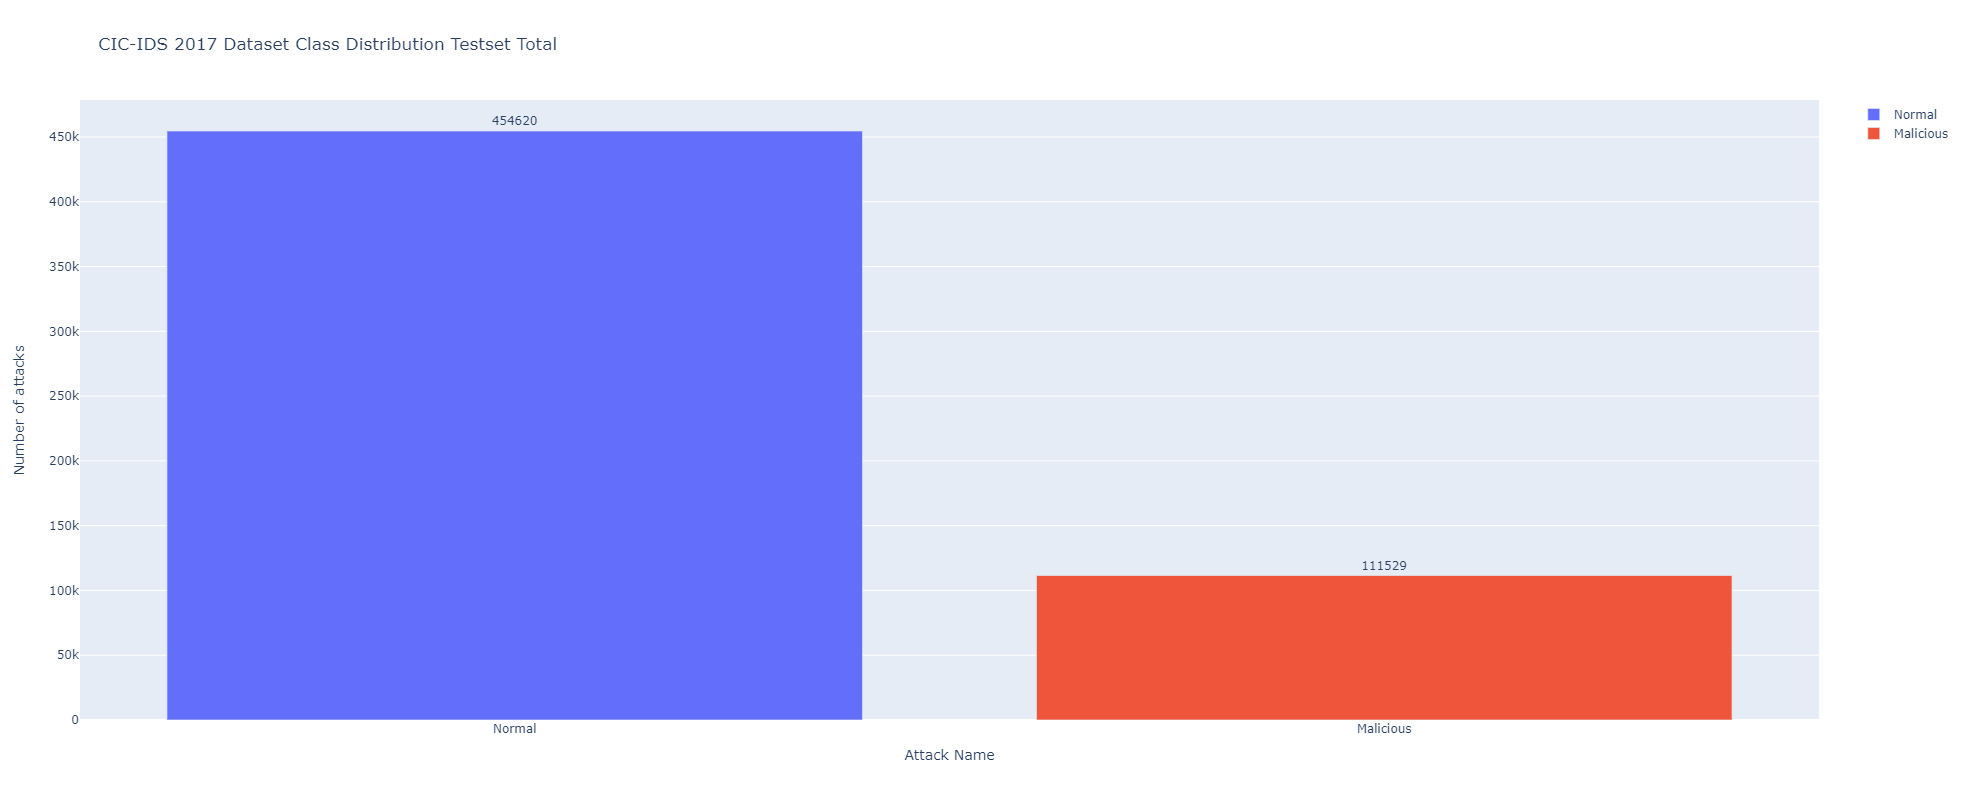

In [29]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           
           y=y_test.value_counts().sum()- y_test.value_counts().values[0:1],
           x=['Malicious'],
           text = y_test.value_counts().sum() - y_test.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution Testset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

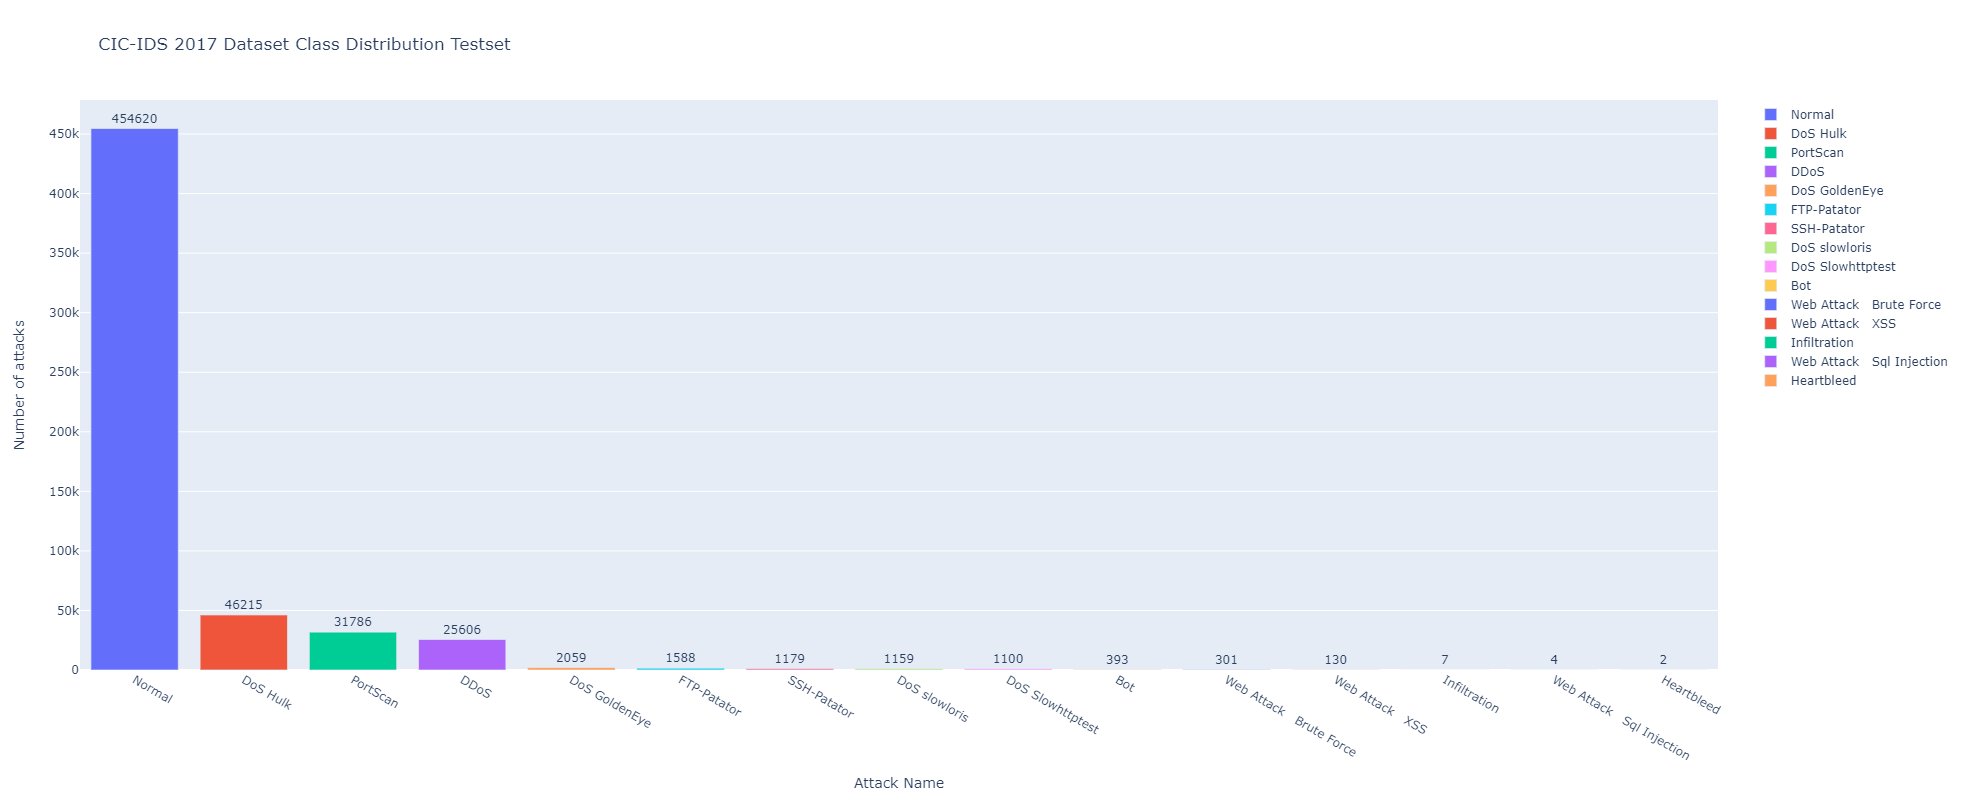

In [31]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=y_test.value_counts().values[1:2],
           x=['DoS Hulk'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=y_test.value_counts().values[2:3],
           x=['PortScan'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=y_test.value_counts().values[3:4],
           x=['DDoS'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=y_test.value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=y_test.value_counts().values[5:6],
           x=['FTP-Patator'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=y_test.value_counts().values[6:7],
           x=['SSH-Patator'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=y_test.value_counts().values[7:8],
           x=['DoS slowloris'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=y_test.value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=y_test.value_counts().values[9:10],
           x=['Bot'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=y_test.value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = y_test.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=y_test.value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = y_test.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=y_test.value_counts().values[12:13],
           x=['Infiltration'],
           text = y_test.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=y_test.value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = y_test.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=y_test.value_counts().values[14:15],
           x=['Heartbleed'],
           text = y_test.value_counts()[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

In [ ]:
for df in [X_train, X_test]:
    numeric_features = df.dtypes[df.dtypes != 'object'].index
    df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

In [33]:
X_train.isnull().sum()
X_test.isnull().sum()

 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean                   0
 Bwd IAT Std                    0
 Bwd IAT Max                    0
 Bwd IAT Min  

Accuracy of DT: 0.986657222745249
Precision of DT: 0.9911174001030333
Recall of DT: 0.986657222745249
F1-score of DT: 0.988606253938005
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.99      0.99    454620
                       Bot       0.70      0.45      0.54       393
                      DDoS       0.99      0.98      0.98     25606
             DoS GoldenEye       0.45      0.73      0.56      2059
                  DoS Hulk       1.00      1.00      1.00     46215
          DoS Slowhttptest       0.92      0.82      0.87      1100
             DoS slowloris       0.99      0.89      0.94      1159
               FTP-Patator       0.83      0.51      0.63      1588
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.71      0.01         7
                  PortScan       0.99      0.99      0.99     31786
               SSH-Patator       1.00      1.00

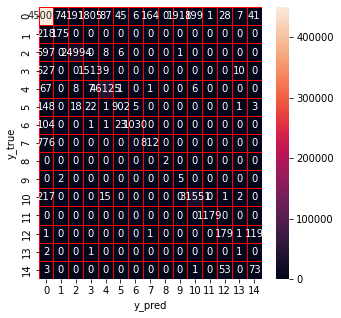

In [34]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
temp1, temp2 = train_test_split(df, train_size = 0.9, test_size = 0.1, random_state = 0, stratify = df.iloc[:,-1])
df=temp2
del temp1, temp2

In [45]:
print(df.info())
print("-------------------------------------------")
print(df.head(5))
print("-------------------------------------------")
print(df.dtypes[df.dtypes == object])
print("-------------------------------------------")
print(df.iloc[:,-1].value_counts())
print("-------------------------------------------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283075 entries, 37390 to 433949
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             283075 non-null  int64  
 1    Flow Duration                283075 non-null  int64  
 2    Total Fwd Packets            283075 non-null  int64  
 3    Total Backward Packets       283075 non-null  int64  
 4   Total Length of Fwd Packets   283075 non-null  int64  
 5    Total Length of Bwd Packets  283075 non-null  int64  
 6    Fwd Packet Length Max        283075 non-null  int64  
 7    Fwd Packet Length Min        283075 non-null  int64  
 8    Fwd Packet Length Mean       283075 non-null  float64
 9    Fwd Packet Length Std        283075 non-null  float64
 10  Bwd Packet Length Max         283075 non-null  int64  
 11   Bwd Packet Length Min        283075 non-null  int64  
 12   Bwd Packet Length Mean       283075 non

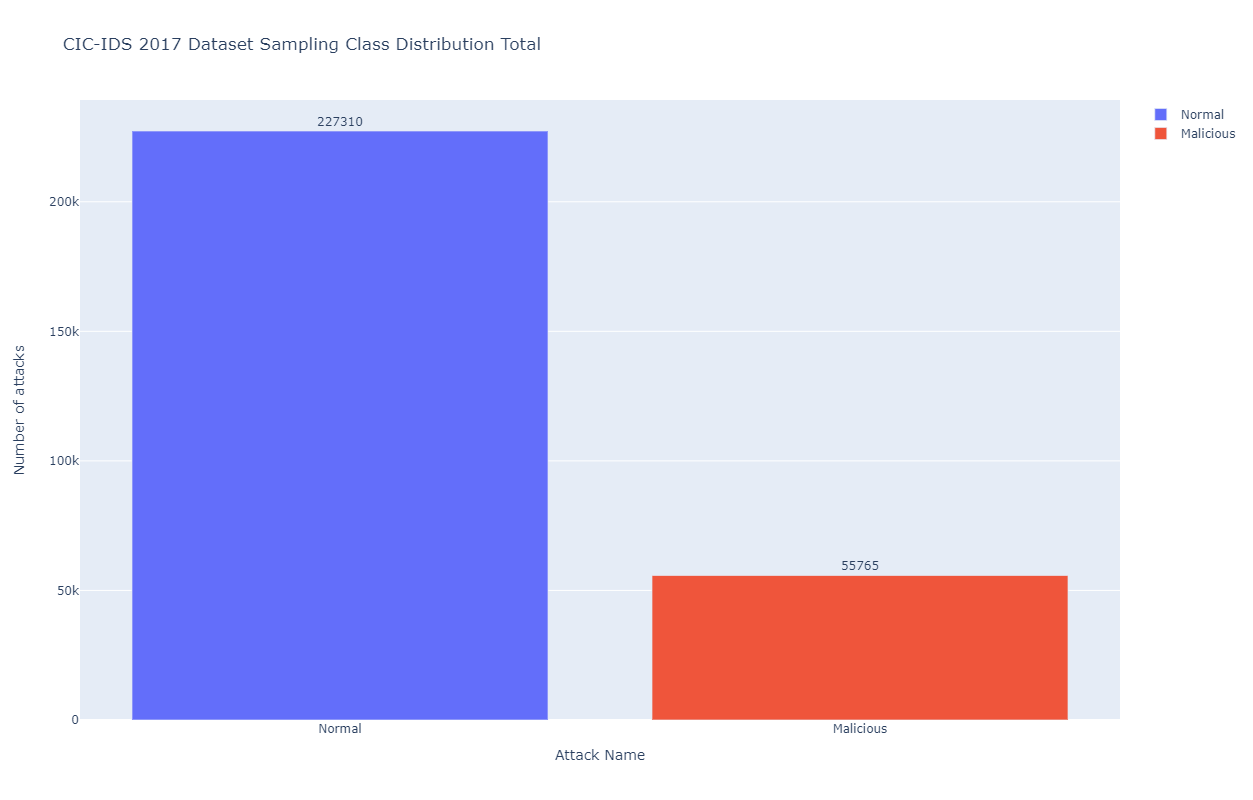

In [46]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           
           y=df.iloc[:,-1].value_counts().sum()- df.iloc[:,-1].value_counts().values[0:1],
           x=['Malicious'],
           text = df.iloc[:,-1].value_counts().sum() - df.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Sampling Class Distribution Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

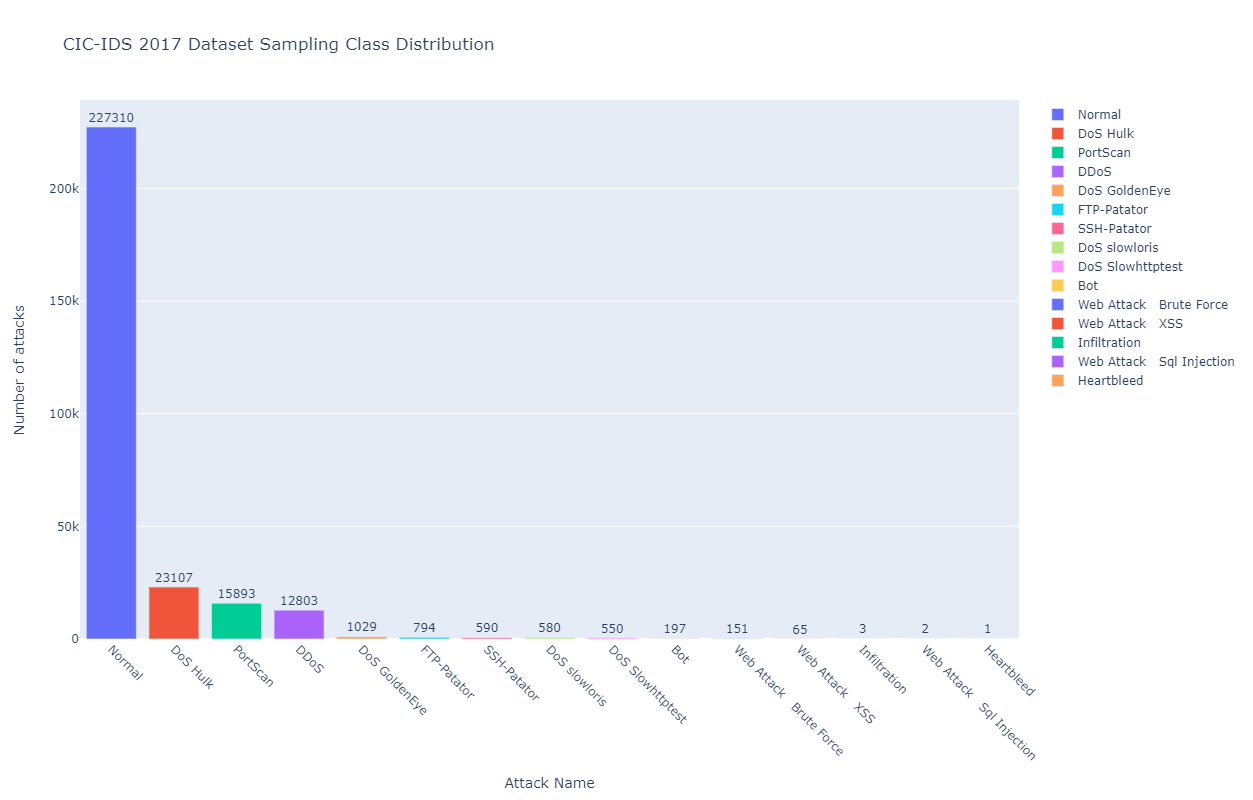

In [54]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df.iloc[:,-1].value_counts().values[0:1],
           x=['Normal'],
           text = df.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=df.iloc[:,-1].value_counts().values[1:2],
           x=['DoS Hulk'],
           text = df.iloc[:,-1].value_counts().values[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=df.iloc[:,-1].value_counts().values[2:3],
           x=['PortScan'],
           text = df.iloc[:,-1].value_counts().values[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=df.iloc[:,-1].value_counts().values[3:4],
           x=['DDoS'],
           text = df.iloc[:,-1].value_counts().values[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=df.iloc[:,-1].value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = df.iloc[:,-1].value_counts().values[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=df.iloc[:,-1].value_counts().values[5:6],
           x=['FTP-Patator'],
           text = df.iloc[:,-1].value_counts().values[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=df.iloc[:,-1].value_counts().values[6:7],
           x=['SSH-Patator'],
           text = df.iloc[:,-1].value_counts().values[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=df.iloc[:,-1].value_counts().values[7:8],
           x=['DoS slowloris'],
           text = df.iloc[:,-1].value_counts().values[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=df.iloc[:,-1].value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = df.iloc[:,-1].value_counts().values[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=df.iloc[:,-1].value_counts().values[9:10],
           x=['Bot'],
           text = df.iloc[:,-1].value_counts().values[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=df.iloc[:,-1].value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = df.iloc[:,-1].value_counts().values[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=df.iloc[:,-1].value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = df.iloc[:,-1].value_counts().values[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=df.iloc[:,-1].value_counts().values[12:13],
           x=['Infiltration'],
           text = df.iloc[:,-1].value_counts().values[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=df.iloc[:,-1].value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = df.iloc[:,-1].value_counts().values[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=df.iloc[:,-1].value_counts().values[14:15],
           x=['Heartbleed'],
           text = df.iloc[:,-1].value_counts().values[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Sampling Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45),

iplot(fig)

In [53]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
df = df.fillna(0)

X = df.iloc[:,:77]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)
print(len(X_train),len(y_train),len(X_test),len(y_test))

226460 226460 56615 56615


In [55]:
print(df.iloc[:,-1].value_counts())

BENIGN                        227310
DoS Hulk                       23107
PortScan                       15893
DDoS                           12803
DoS GoldenEye                   1029
FTP-Patator                      794
SSH-Patator                      590
DoS slowloris                    580
DoS Slowhttptest                 550
Bot                              197
Web Attack � Brute Force         151
Web Attack � XSS                  65
Infiltration                       3
Web Attack � Sql Injection         2
Heartbleed                         1
Name:  Label, dtype: int64


In [56]:
print(y_train.value_counts())
print("---------------------------")
print(y_test.value_counts())

BENIGN                        181843
DoS Hulk                       18437
PortScan                       12769
DDoS                           10263
DoS GoldenEye                    839
FTP-Patator                      612
DoS slowloris                    469
SSH-Patator                      455
DoS Slowhttptest                 435
Bot                              152
Web Attack � Brute Force         125
Web Attack � XSS                  57
Infiltration                       3
Web Attack � Sql Injection         1
Name:  Label, dtype: int64
---------------------------
BENIGN                        45467
DoS Hulk                       4670
PortScan                       3124
DDoS                           2540
DoS GoldenEye                   190
FTP-Patator                     182
SSH-Patator                     135
DoS Slowhttptest                115
DoS slowloris                   111
Bot                              45
Web Attack � Brute Force         26
Web Attack � XSS               

In [58]:
print(y_train.value_counts().sum())


226460


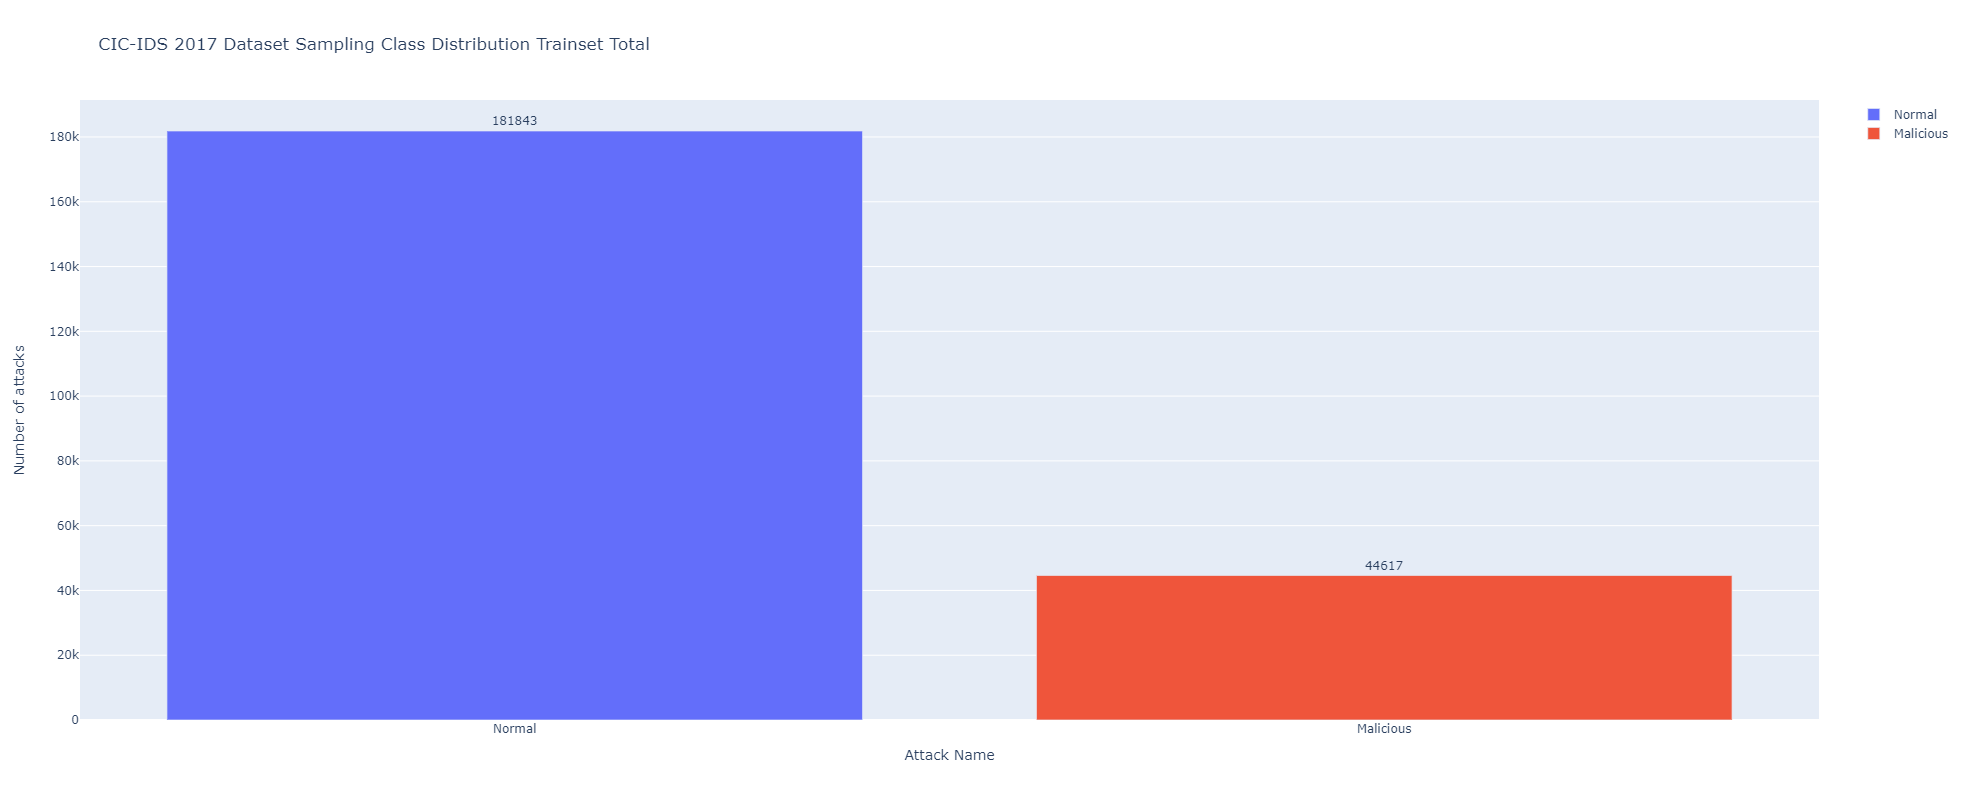

In [57]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=y_train.value_counts().sum()- y_train.value_counts().values[0:1],
           x=['Malicious'],
           text = y_train.value_counts().sum() - y_train.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Sampling Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

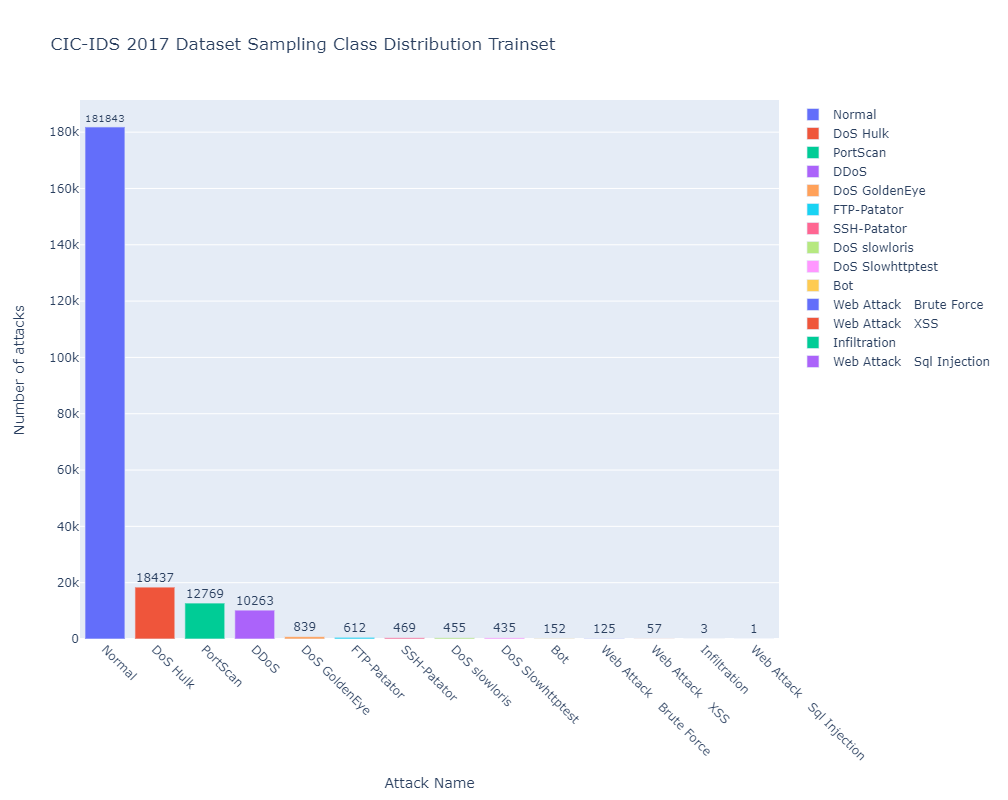

In [60]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=y_train.value_counts().values[1:2],
           x=['DoS Hulk'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=y_train.value_counts().values[2:3],
           x=['PortScan'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=y_train.value_counts().values[3:4],
           x=['DDoS'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=y_train.value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=y_train.value_counts().values[5:6],
           x=['FTP-Patator'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=y_train.value_counts().values[6:7],
           x=['SSH-Patator'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=y_train.value_counts().values[7:8],
           x=['DoS slowloris'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=y_train.value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=y_train.value_counts().values[9:10],
           x=['Bot'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=y_train.value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = y_train.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=y_train.value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = y_train.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=y_train.value_counts().values[12:13],
           x=['Infiltration'],
           text = y_train.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=y_train.value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = y_train.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=y_train.value_counts().values[14:15],
           x=['Heartbleed'],
           text = y_train.value_counts()[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Sampling Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
),
                  

iplot(fig)

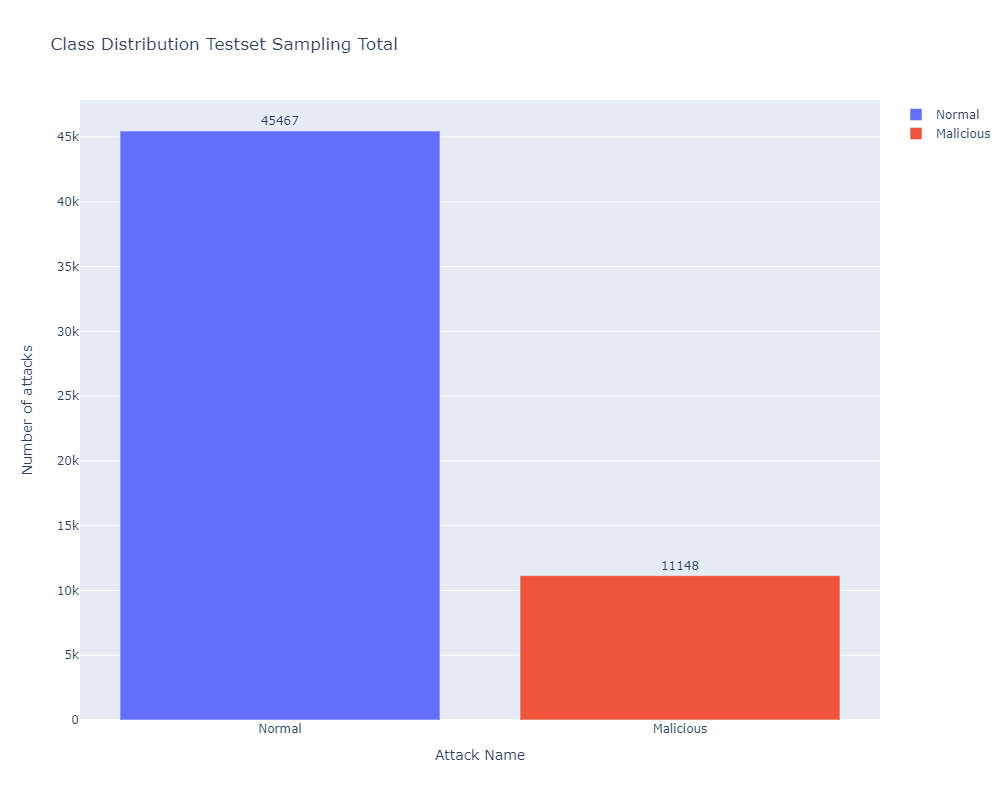

In [61]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           
           y=y_test.value_counts().sum()- y_test.value_counts().values[0:1],
           x=['Malicious'],
           text = y_test.value_counts().sum() - y_test.value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'Class Distribution Testset Sampling Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

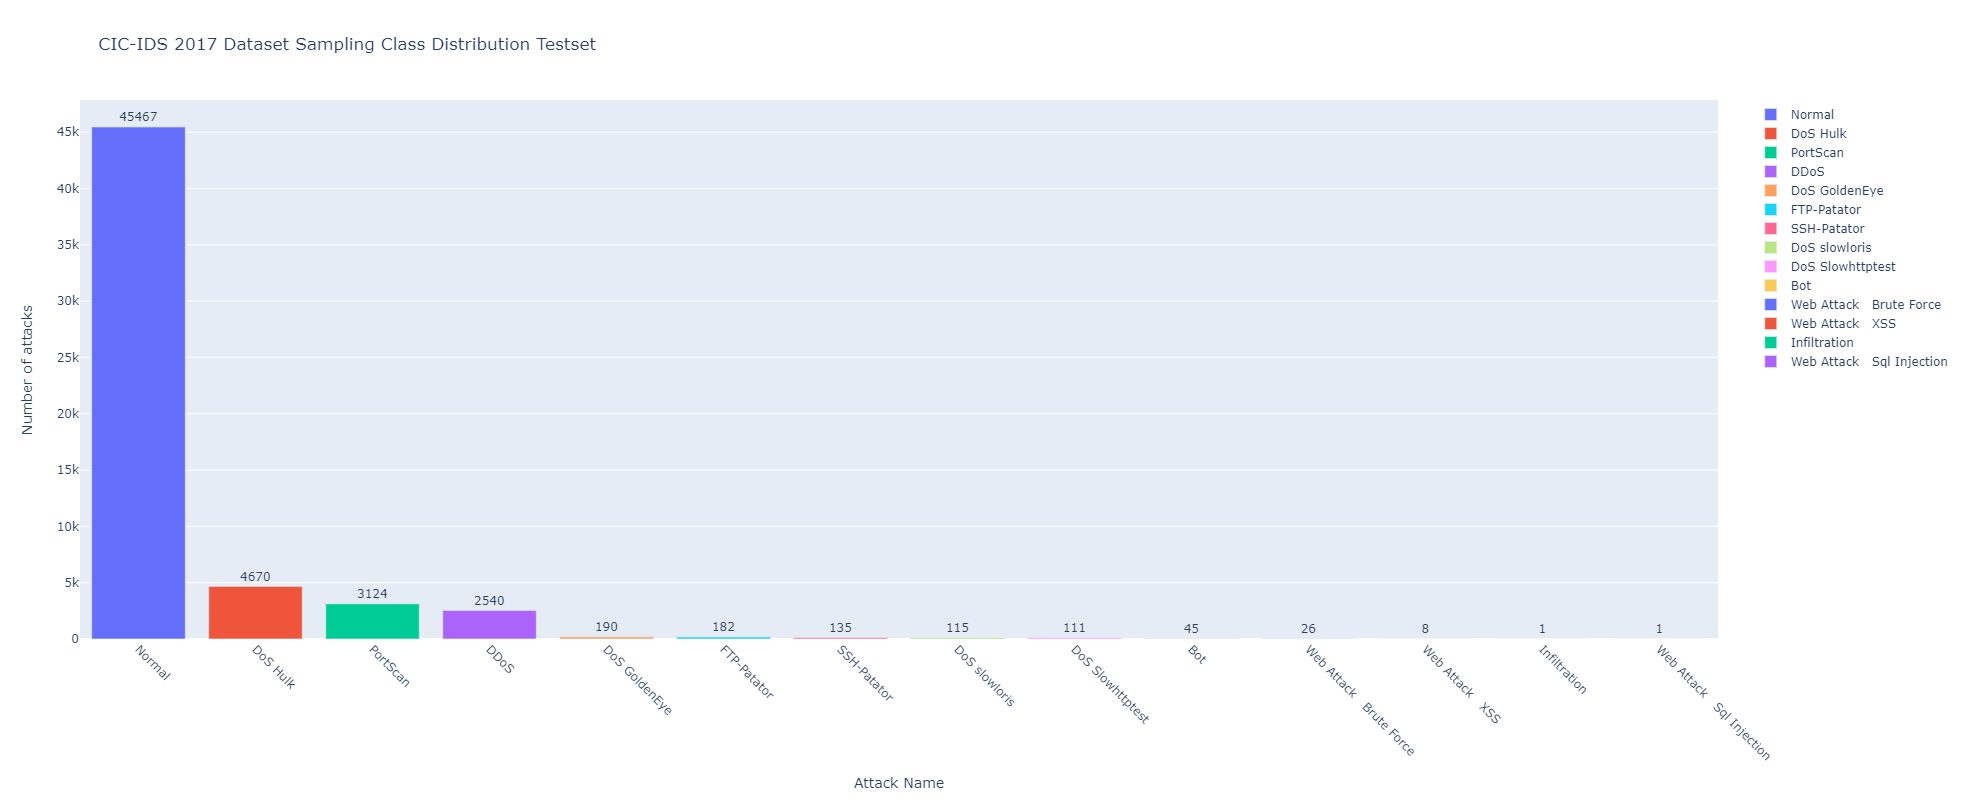

In [63]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Hulk', 
           y=y_test.value_counts().values[1:2],
           x=['DoS Hulk'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='PortScan', 
           y=y_test.value_counts().values[2:3],
           x=['PortScan'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDoS', 
           y=y_test.value_counts().values[3:4],
           x=['DDoS'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS GoldenEye', 
           y=y_test.value_counts().values[4:5],
           x=['DoS GoldenEye'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-Patator', 
           y=y_test.value_counts().values[5:6],
           x=['FTP-Patator'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Patator', 
           y=y_test.value_counts().values[6:7],
           x=['SSH-Patator'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS slowloris', 
           y=y_test.value_counts().values[7:8],
           x=['DoS slowloris'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS Slowhttptest', 
           y=y_test.value_counts().values[8:9],
           x=['DoS Slowhttptest'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Bot', 
           y=y_test.value_counts().values[9:10],
           x=['Bot'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Brute Force', 
           y=y_test.value_counts().values[10:11],
           x=['Web Attack   Brute Force'],
           text = y_test.value_counts()[10:11],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   XSS', 
           y=y_test.value_counts().values[11:12],
           x=['Web Attack   XSS'],
           text = y_test.value_counts()[11:12],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Infiltration', 
           y=y_test.value_counts().values[12:13],
           x=['Infiltration'],
           text = y_test.value_counts()[12:13],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Web Attack   Sql Injection', 
           y=y_test.value_counts().values[13:14],
           x=['Web Attack   Sql Injection'],
           text = y_test.value_counts()[13:14],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Heartbleed', 
           y=y_test.value_counts().values[14:15],
           x=['Heartbleed'],
           text = y_test.value_counts()[14:15],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'CIC-IDS 2017 Dataset Sampling Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
),
                  

iplot(fig)

In [ ]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

# UNSW_NB15

In [ ]:
#del df_train, df_test

In [4]:
df_train=pd.read_csv(UNSW_NB15_train_path)
df_test=pd.read_csv(UNSW_NB15_test_path)

In [5]:
print(df_train.info())
print("-------------------------------------------")
print(df_train.head(5))
print("-------------------------------------------")
print(df_train.dtypes[df_train.dtypes == object])
print("-------------------------------------------")
print(df_train['label'].value_counts())
print("-------------------------------------------")
print(df_train.isnull().sum())

print("###########################################") 

print(df_test.info())
print("-------------------------------------------")
print(df_test.head(5))
print("-------------------------------------------")
print(df_test.dtypes[df_test.dtypes == object])
print("-------------------------------------------")
print(df_test['label'].value_counts())
print(df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
df_train, df_test = df_test, df_train

In [8]:
len(df_train)

82332

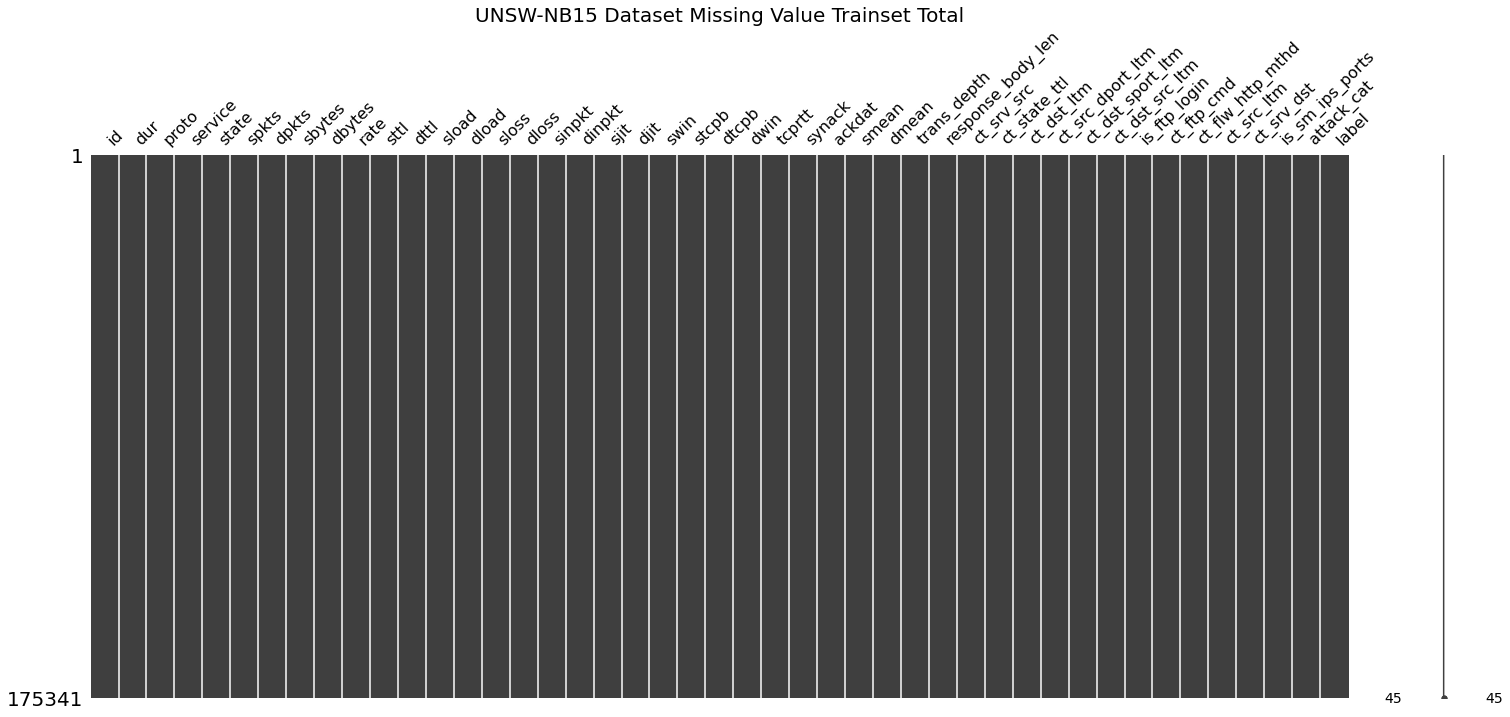

In [9]:
#missing value
msno.matrix(df_train)
plt.title("UNSW-NB15 Dataset Missing Value Trainset Total", fontsize = 20)
plt.show()

                     id   dur  spkts  dpkts  sbytes  dbytes  rate  sttl  dttl  sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label
id                 1.00  0.01  -0.07  -0.13    0.00   -0.08  0.36  0.62 -0.05   0.14  -0.36  -0.02  -0.10    0.03   -0.03 -0.02 -0.08 -0.42  -0.33  -0.33 -0.41    0.00   -0.00    0.01  -0.08  -0.36        -0.02              -0.02        0.48          0.62        0.47              0.54              0.60            0.54         -0.04       -0.04             -0.03        0.43        0.48             0.03   0.73
dur                0.01  1.00   0.25   0.18    0.20    0.14 -0.12  0.01  0.04  -0.08  -0.05   0.20   0.14    0.08    0.15  0.14  0.16  0.02   0.01   0.01  0.02    0.05    0.05 

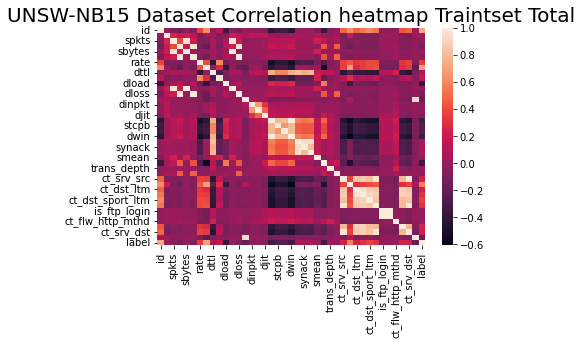

In [10]:
print(df_train.corr())
  
# plotting correlation heatmap
plt.title("UNSW-NB15 Dataset Correlation heatmap Traintset Total", fontsize = 20)
ax = sns.heatmap(df_train.corr())
plt.show()

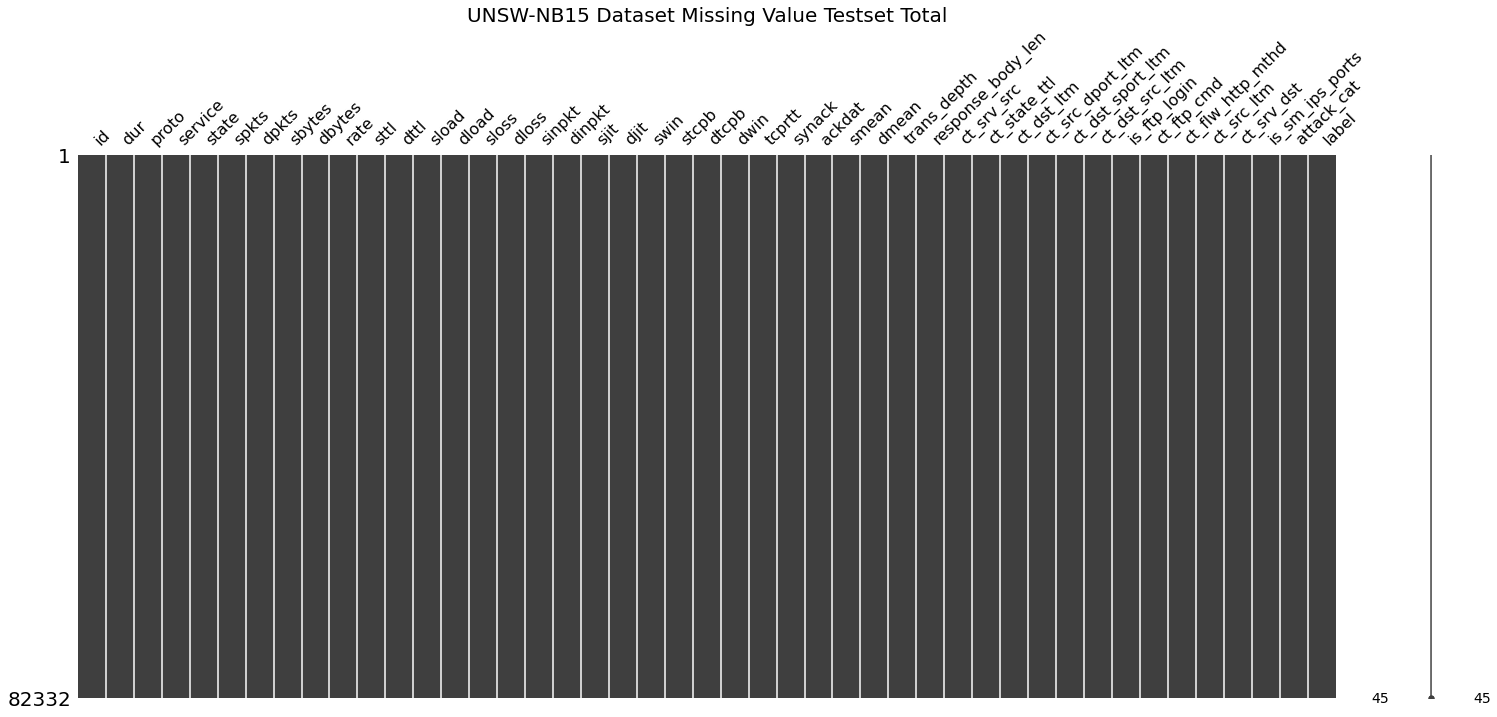

In [12]:
#missing value
msno.matrix(df_test)
plt.title("UNSW-NB15 Dataset Missing Value Testset Total", fontsize = 20)
plt.show()

                     id   dur  spkts  dpkts  sbytes  dbytes  rate  sttl  dttl  sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label
id                 1.00  0.01  -0.07  -0.13    0.00   -0.08  0.36  0.62 -0.05   0.14  -0.36  -0.02  -0.10    0.03   -0.03 -0.02 -0.08 -0.42  -0.33  -0.33 -0.41    0.00   -0.00    0.01  -0.08  -0.36        -0.02              -0.02        0.48          0.62        0.47              0.54              0.60            0.54         -0.04       -0.04             -0.03        0.43        0.48             0.03   0.73
dur                0.01  1.00   0.25   0.18    0.20    0.14 -0.12  0.01  0.04  -0.08  -0.05   0.20   0.14    0.08    0.15  0.14  0.16  0.02   0.01   0.01  0.02    0.05    0.05 

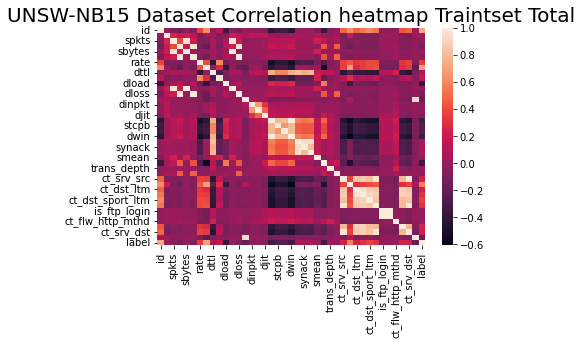

In [13]:
print(df_train.corr())
  
# plotting correlation heatmap
plt.title("UNSW-NB15 Dataset Correlation heatmap Traintset Total", fontsize = 20)
ax = sns.heatmap(df_train.corr())
plt.show()

In [17]:
df_train.iloc[:,-1].value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [18]:
df_test.iloc[:,-1].value_counts()

1    45332
0    37000
Name: label, dtype: int64

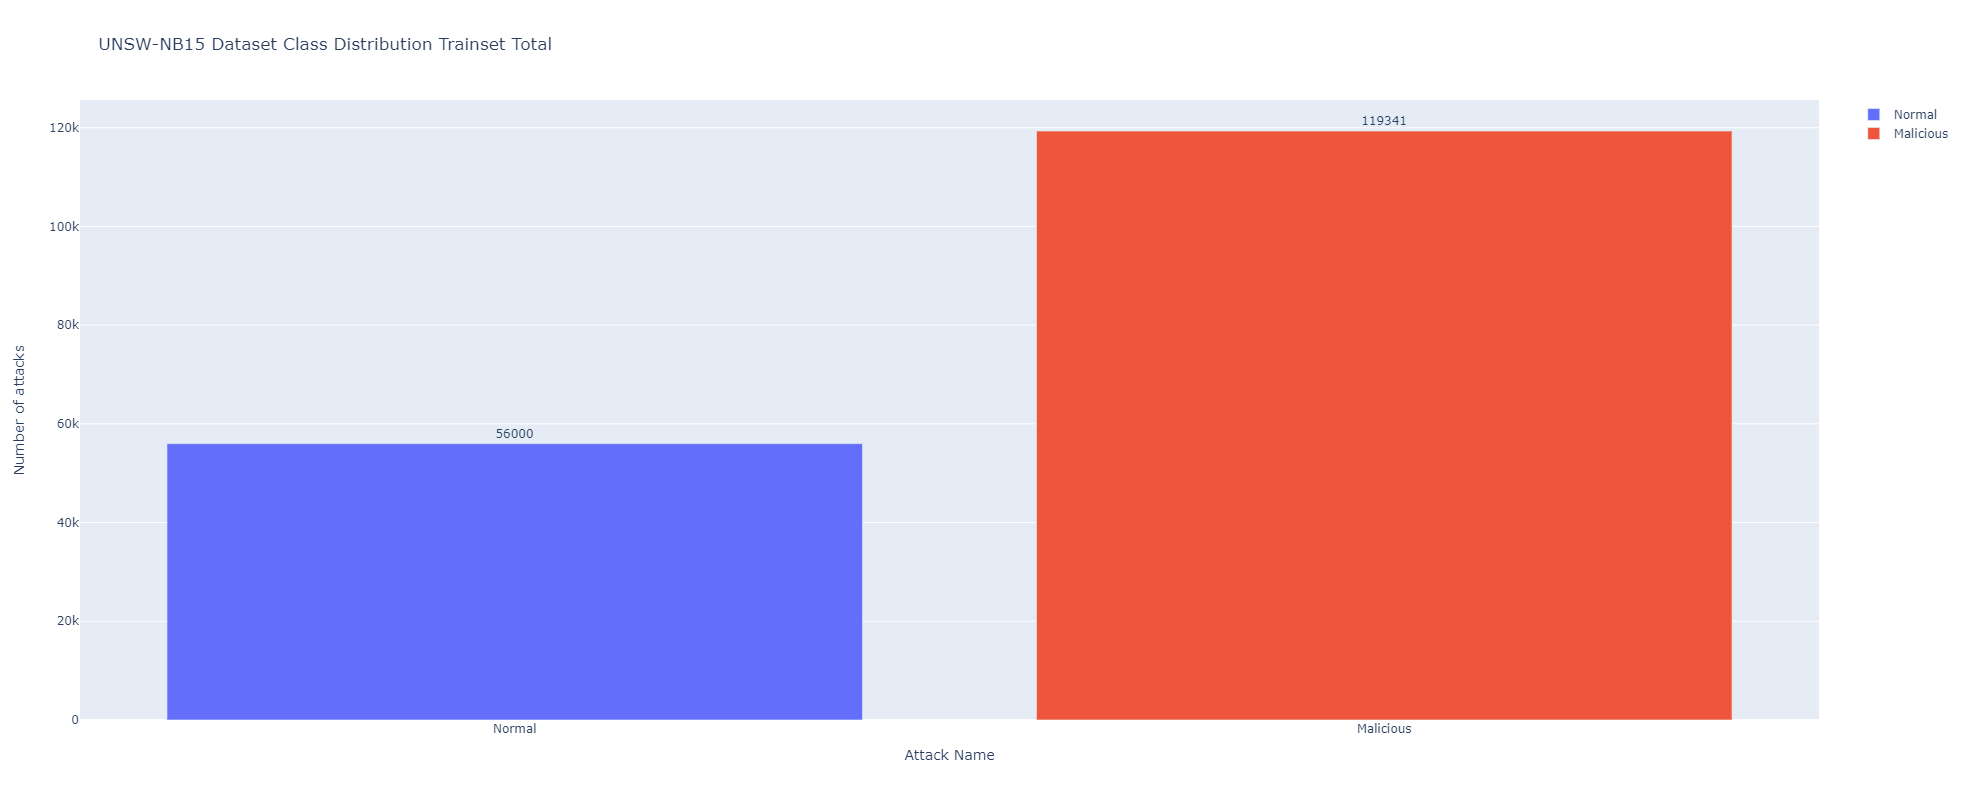

In [19]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df_train.iloc[:,-1].value_counts().values[1:2],
           x=['Normal'],
           text = df_train.iloc[:,-1].value_counts().values[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_train.iloc[:,-1].value_counts().values[0:1],
           x=['Malicious'],
           text = df_train.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'UNSW-NB15 Dataset Class Distribution Trainset Total',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

In [16]:
df_train.iloc[:,-2].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [19]:
y_train=df_train.iloc[:,-2]
y_train.value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

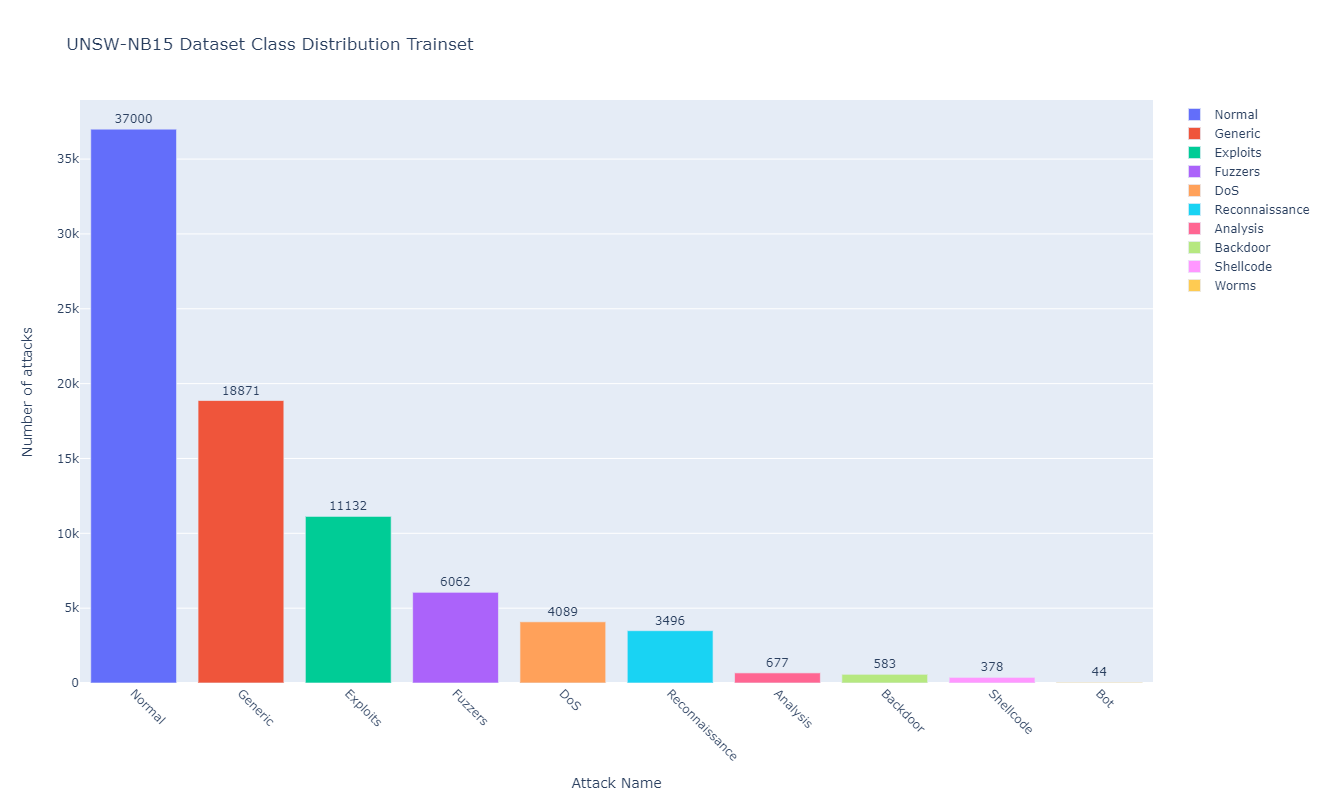

In [22]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_train.value_counts().values[0:1],
           x=['Normal'],
           text = y_train.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Generic', 
           y=y_train.value_counts().values[1:2],
           x=['Generic'],
           text = y_train.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Exploits', 
           y=y_train.value_counts().values[2:3],
           x=['Exploits'],
           text = y_train.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Fuzzers', 
           y=y_train.value_counts().values[3:4],
           x=['Fuzzers'],
           text = y_train.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS', 
           y=y_train.value_counts().values[4:5],
           x=['DoS'],
           text = y_train.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Reconnaissance', 
           y=y_train.value_counts().values[5:6],
           x=['Reconnaissance'],
           text = y_train.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Analysis', 
           y=y_train.value_counts().values[6:7],
           x=['Analysis'],
           text = y_train.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Backdoor', 
           y=y_train.value_counts().values[7:8],
           x=['Backdoor'],
           text = y_train.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Shellcode', 
           y=y_train.value_counts().values[8:9],
           x=['Shellcode'],
           text = y_train.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Worms', 
           y=y_train.value_counts().values[9:10],
           x=['Bot'],
           text = y_train.value_counts()[9:10],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'UNSW-NB15 Dataset Class Distribution Trainset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
),
                  

iplot(fig)

In [9]:
df_test.iloc[:,-2].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [12]:
y_test.value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

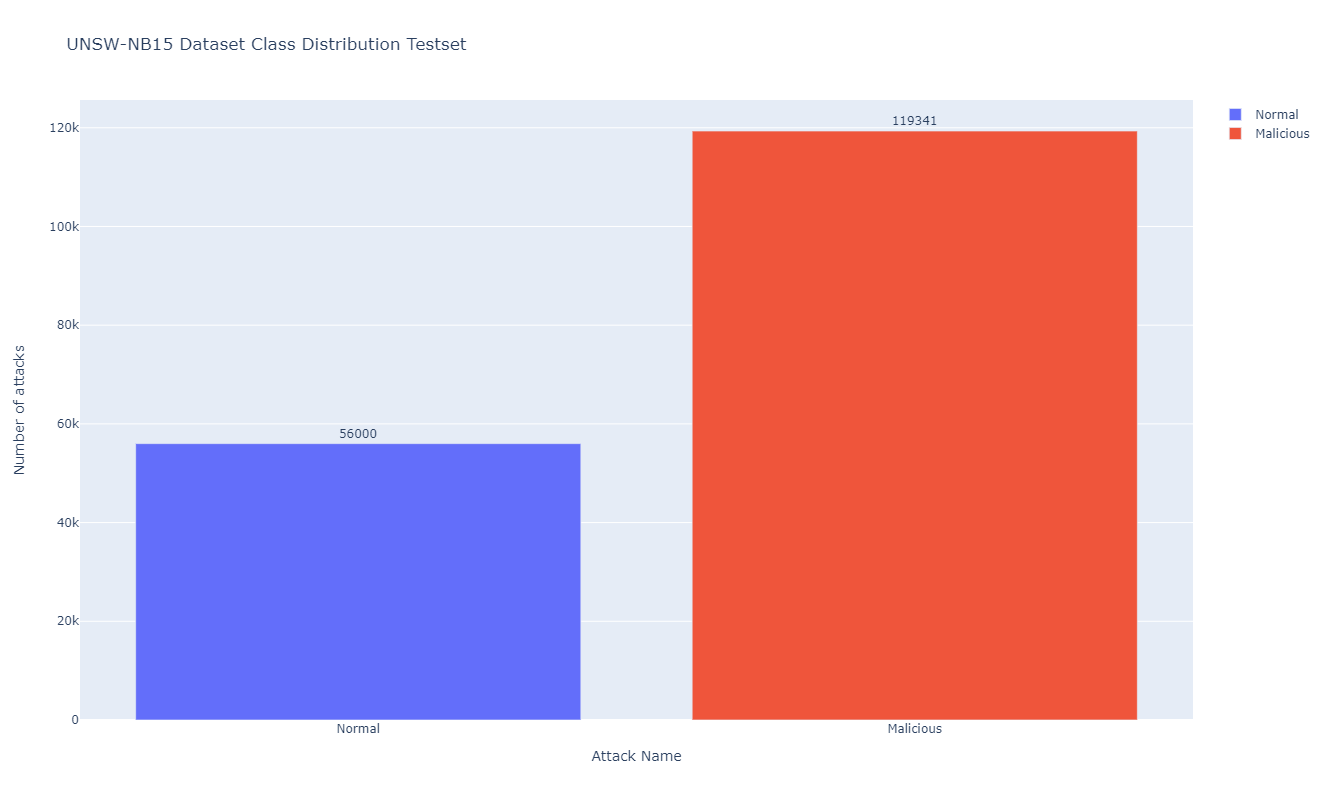

In [14]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df_test.iloc[:,-1].value_counts().values[1:2],
           x=['Normal'],
           text = df_test.iloc[:,-1].value_counts().values[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_test.iloc[:,-1].value_counts().values[0:1],
           x=['Malicious'],
           text = df_test.iloc[:,-1].value_counts().values[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'UNSW-NB15 Dataset Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)

iplot(fig)

In [10]:
y_test=df_test.iloc[:,-2]

In [11]:
y_test.value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

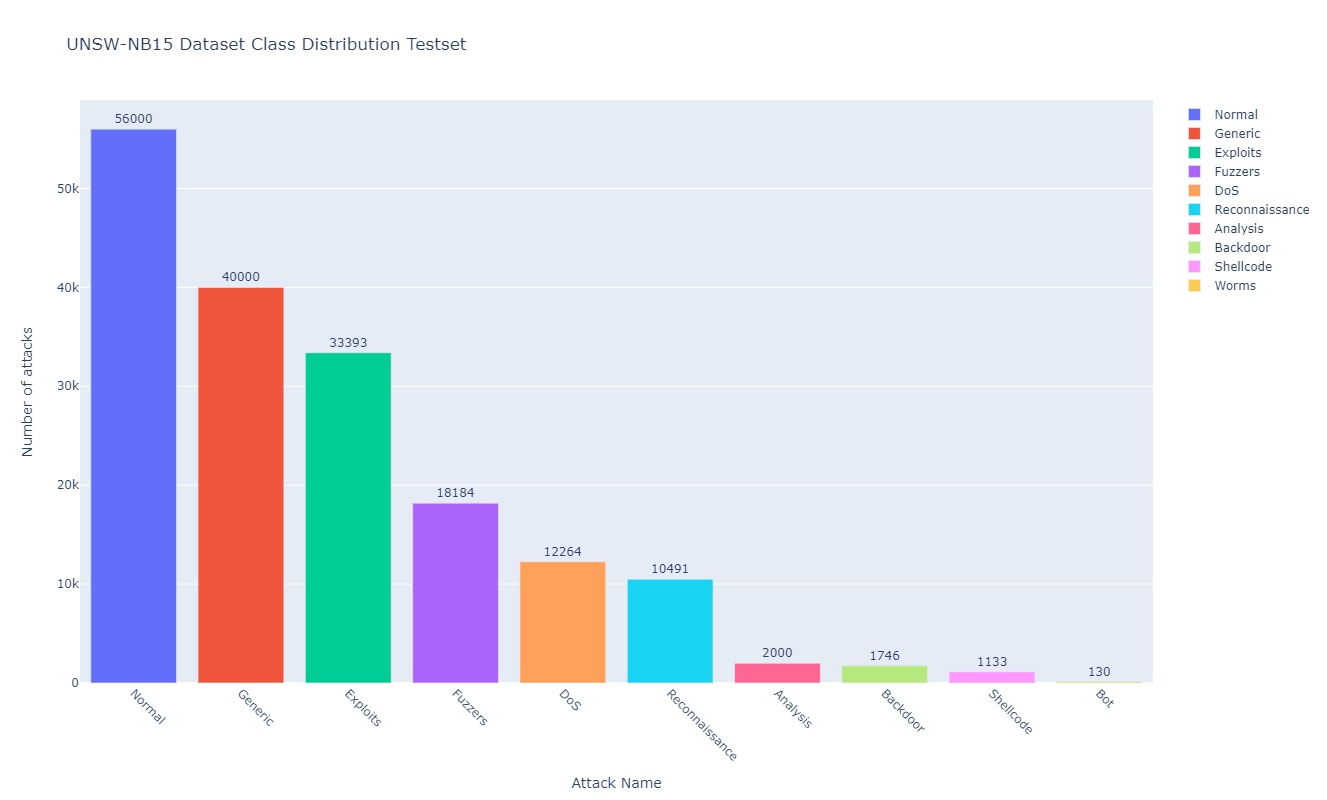

In [23]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=y_test.value_counts().values[0:1],
           x=['Normal'],
           text = y_test.value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Generic', 
           y=y_test.value_counts().values[1:2],
           x=['Generic'],
           text = y_test.value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Exploits', 
           y=y_test.value_counts().values[2:3],
           x=['Exploits'],
           text = y_test.value_counts()[2:3],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Fuzzers', 
           y=y_test.value_counts().values[3:4],
           x=['Fuzzers'],
           text = y_test.value_counts()[3:4],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DoS', 
           y=y_test.value_counts().values[4:5],
           x=['DoS'],
           text = y_test.value_counts()[4:5],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Reconnaissance', 
           y=y_test.value_counts().values[5:6],
           x=['Reconnaissance'],
           text = y_test.value_counts()[5:6],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Analysis', 
           y=y_test.value_counts().values[6:7],
           x=['Analysis'],
           text = y_test.value_counts()[6:7],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Backdoor', 
           y=y_test.value_counts().values[7:8],
           x=['Backdoor'],
           text = y_test.value_counts()[7:8],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Shellcode', 
           y=y_test.value_counts().values[8:9],
           x=['Shellcode'],
           text = y_test.value_counts()[8:9],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Worms', 
           y=y_test.value_counts().values[9:10],
           x=['Bot'],
           text = y_test.value_counts()[9:10],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=1000,
                  height=800,
                  title=f'UNSW-NB15 Dataset Class Distribution Testset',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',
                  xaxis_tickangle=45
),
                  

iplot(fig)

In [9]:
df_train.drop(['id','label'],axis=1, inplace=True)
df_test.drop(['id','label'],axis=1, inplace=True)

In [10]:
print(df_train.dtypes[df_train.dtypes == object])
print(df_test.dtypes[df_test.dtypes == object])

proto         object
service       object
state         object
attack_cat    object
dtype: object
proto         object
service       object
state         object
attack_cat    object
dtype: object


In [11]:
for dataset in [df_train, df_test]:
  numeric_features = dataset.dtypes[dataset.dtypes != 'object'].index
  dataset[numeric_features] = dataset[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
  #labelencoder = LabelEncoder()
  #dataset.iloc[:, -1] = labelencoder.fit_transform(dataset.iloc[:, -1])
for i in ['proto',"service","state"]:
    df_train[i] = df_train[i].astype('category').cat.codes
    df_test[i] = df_test[i].astype('category').cat.codes

In [93]:
len(df_test)

82332

In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int16  
 2   service            175341 non-null  int8   
 3   state              175341 non-null  int8   
 4   spkts              175341 non-null  float64
 5   dpkts              175341 non-null  float64
 6   sbytes             175341 non-null  float64
 7   dbytes             175341 non-null  float64
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  float64
 10  dttl               175341 non-null  float64
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  float64
 14  dloss              175341 non-null  float64
 15  sinpkt             175341 non-null  float64
 16  di

In [13]:
X_train = df_train.iloc[:,:42]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:42]
y_test = df_test.iloc[:,-1]
print(len(X_train),len(y_train),len(X_test),len(y_test))

175341 175341 82332 82332


Accuracy of DT: 0.6086819219744449
Precision of DT: 0.7222494140644102
Recall of DT: 0.6086819219744449
F1-score of DT: 0.6488589519417728
                precision    recall  f1-score   support

      Analysis       0.02      0.03      0.02       677
      Backdoor       0.03      0.01      0.01       583
           DoS       0.19      0.12      0.14      4089
      Exploits       0.48      0.62      0.54     11132
       Fuzzers       0.16      0.35      0.22      6062
       Generic       0.93      0.78      0.85     18871
        Normal       0.92      0.66      0.77     37000
Reconnaissance       0.21      0.38      0.27      3496
     Shellcode       0.06      0.38      0.10       378
         Worms       0.20      0.09      0.13        44

      accuracy                           0.61     82332
     macro avg       0.32      0.34      0.31     82332
  weighted avg       0.72      0.61      0.65     82332



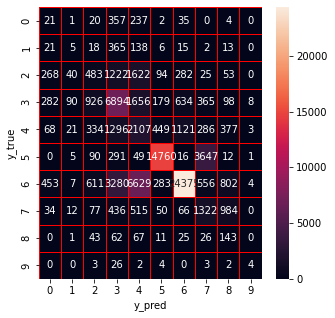

In [14]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
#plt.title("", fontsize = 20)
plt.show()

In [46]:
df = pd.read_csv("/kaggle/input/unsw-nb15/UNSW-NB15_1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   59.166.0.0     700000 non-null  object 
 1   1390           700000 non-null  object 
 2   149.171.126.6  700000 non-null  object 
 3   53             700000 non-null  object 
 4   udp            700000 non-null  object 
 5   CON            700000 non-null  object 
 6   0.001055       700000 non-null  float64
 7   132            700000 non-null  int64  
 8   164            700000 non-null  int64  
 9   31             700000 non-null  int64  
 10  29             700000 non-null  int64  
 11  0              700000 non-null  int64  
 12  0.1            700000 non-null  int64  
 13  dns            700000 non-null  object 
 14  500473.9375    700000 non-null  float64
 15  621800.9375    700000 non-null  float64
 16  2              700000 non-null  int64  
 17  2.1            700000 non-nul

In [49]:
df.iloc[:,0].head(5)

0    59.166.0.0
1    59.166.0.6
2    59.166.0.5
3    59.166.0.3
4    59.166.0.0
Name: 59.166.0.0, dtype: object

In [50]:
for i in [df.iloc[:,0]]:
    df[i] = df[i].astype('category').cat.codes

KeyError: "['59.166.0.6', '59.166.0.5', '59.166.0.3', '10.40.182.3', '59.166.0.7', '10.40.170.2', '59.166.0.1', '59.166.0.2', '59.166.0.4', '175.45.176.3', '175.45.176.2', '175.45.176.0', '59.166.0.8', '59.166.0.9', '175.45.176.1', '10.40.182.1', '10.40.85.1', '192.168.241.243', '10.40.85.30', '149.171.126.16', '149.171.126.2', '149.171.126.11', '149.171.126.4', '149.171.126.5', '149.171.126.17', '149.171.126.19', '149.171.126.9', '149.171.126.8', '149.171.126.7', '149.171.126.15', '149.171.126.0', '149.171.126.1', '149.171.126.3', '149.171.126.13', '149.171.126.12', '149.171.126.10', '149.171.126.18', '127.0.0.1'] not in index"

In [15]:
df_test.to_csv('test.txt')

In [16]:
df_test.to_csv('test.csv')

In [17]:
from joblib import dump, load
dump(dt, 'DT_UNSW_NB15.joblib')

['DT_UNSW_NB15.joblib']

In [18]:
clf = load('DT_UNSW_NB15.joblib') 
dt=clf

In [19]:
df=pd.read_csv("/kaggle/working/test.txt")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  int64  
 3   service            82332 non-null  int64  
 4   state              82332 non-null  int64  
 5   spkts              82332 non-null  float64
 6   dpkts              82332 non-null  float64
 7   sbytes             82332 non-null  float64
 8   dbytes             82332 non-null  float64
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  float64
 11  dttl               82332 non-null  float64
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  float64
 15  dloss              82332 non-null  float64
 16  sinpkt             823

In [21]:
X_test=df.iloc[:,1:43]

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  int64  
 2   service            82332 non-null  int64  
 3   state              82332 non-null  int64  
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [23]:
y_test=df.iloc[:,-1]

['Shellcode' 'Fuzzers' 'Normal' ... 'Normal' 'Normal' 'Shellcode']
Accuracy of DT: 0.6086819219744449
Precision of DT: 0.7222494140644102
Recall of DT: 0.6086819219744449
F1-score of DT: 0.6488589519417728
                precision    recall  f1-score   support

      Analysis       0.02      0.03      0.02       677
      Backdoor       0.03      0.01      0.01       583
           DoS       0.19      0.12      0.14      4089
      Exploits       0.48      0.62      0.54     11132
       Fuzzers       0.16      0.35      0.22      6062
       Generic       0.93      0.78      0.85     18871
        Normal       0.92      0.66      0.77     37000
Reconnaissance       0.21      0.38      0.27      3496
     Shellcode       0.06      0.38      0.10       378
         Worms       0.20      0.09      0.13        44

      accuracy                           0.61     82332
     macro avg       0.32      0.34      0.31     82332
  weighted avg       0.72      0.61      0.65     82332



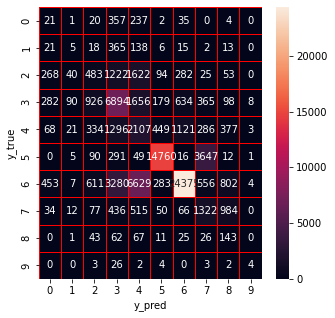

In [24]:

y_predict = dt.predict(X_test)
print(y_predict) 
y_true = y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
#plt.title("", fontsize = 20)
plt.show()

In [37]:
test="1.833333669444506e-07,117,0,4,9.394081728511038e-05,0.0,3.287881162600352e-05,0.0,0.09090908992727273,0.996078431372549,0.0,0.03423758983203815,0.0,0.0,0.0,1.8330280730582334e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15135135135135136,0.0,0.0,0.0,0.016129032258064516,0.3333333333333333,0.0,0.0,0.0,0.016129032258064516,0.0,0.0,0.0,0.0,0.01639344262295082,0.0"

In [44]:
test[1]

'117'

In [38]:
test=test.split(",")

In [39]:
test=np.array(test)

In [43]:
y_predict = dt.predict(test.reshape(1, -1))
print(y_predict) 

['Shellcode']
